In [46]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from heatmap import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas_profiling
from scipy.optimize import curve_fit
from scipy import stats



data = pd.read_csv("../multiOutput/summary/newData1111.tsv",
sep="\t",
dtype={'Pop':'str', 'Run':'int', 'Gen':'int', 'preAPref':'float', 'preIPref':'float', 'preOPref':'float', 'Matings':'float','Contacts':'float', 'MMContacts':'float', 'MalF':'float', 'FemF':'float', 'APref':'float', 'IPref':'float', 'OPref':'float','migrations':'float', 'A':'float', 'I':'float', 'O':'float', 'M':'float', 'F':'float', 'T':'float', 'matingSuccess':'float', 'misIdent':'float'})
data.fillna(value=0, inplace=True)
data = data[data["Pop"] != "Total"]

data["maleRatio"] = data["M"]/data["T"]
data.rename(index=str, columns={"T":"Total"}, inplace=True)



In [41]:
def chiSquare(depVar, indepVar):
    contTable = pd.crosstab(indepVar, depVar, margins=False)
    print(contTable)
    obsV = np.array(contTable)
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(obsV)
    print("===Chi2 Stat===")
    print(chi2_stat)
    print("\n")
    print("===Degrees of Freedom===")
    print(dof)
    print("\n")
    print("===P-Value===")
    print(p_val)
    print("\n")
    print("===Contingency Table===")
    print(ex)
    return obsV

In [63]:
data["APres"] = (data["A"]>0).astype(int)
data["IPres"] = (data["I"]>0).astype(int)
data["OPres"] = (data["O"]>0).astype(int)
data["nMorphs"] = data["APres"]+data["OPres"]+data["IPres"]
monomorphic = data[data["nMorphs"]==1]
monomorphic = monomorphic[monomorphic["Gen"]==200]
print(monomorphic.Total.describe())
dimorphic = data[data["nMorphs"]==2]
dimorphic = dimorphic[dimorphic["Gen"]==200]
print(dimorphic.Total.describe())
trimorphic = data[data["nMorphs"]==3]
trimorphic = trimorphic[trimorphic["Gen"]==200]
print(trimorphic.Total.describe())
print("1 vs 2")
print(stats.ttest_ind(monomorphic["Total"], dimorphic["Total"], equal_var=False))
print("1 vs 3")
print(stats.ttest_ind(monomorphic["Total"], trimorphic["Total"], equal_var=False))
print("2 vs 3")
print(stats.ttest_ind(dimorphic["Total"],  trimorphic["Total"], equal_var=False))


count    901.000000
mean     317.115427
std       48.615407
min      188.000000
25%      282.000000
50%      318.000000
75%      350.000000
max      452.000000
Name: Total, dtype: float64
count    1131.000000
mean      466.040672
std        55.247826
min       255.000000
25%       428.000000
50%       465.000000
75%       502.000000
max       718.000000
Name: Total, dtype: float64
count     68.000000
mean     535.191176
std       61.814179
min      381.000000
25%      501.000000
50%      542.000000
75%      563.250000
max      677.000000
Name: Total, dtype: float64
1 vs 2
Ttest_indResult(statistic=-64.55556494825116, pvalue=0.0)
1 vs 3
Ttest_indResult(statistic=-28.435849300128066, pvalue=2.3010721186523914e-41)
2 vs 3
Ttest_indResult(statistic=-9.011044249361788, pvalue=1.662190115469169e-13)


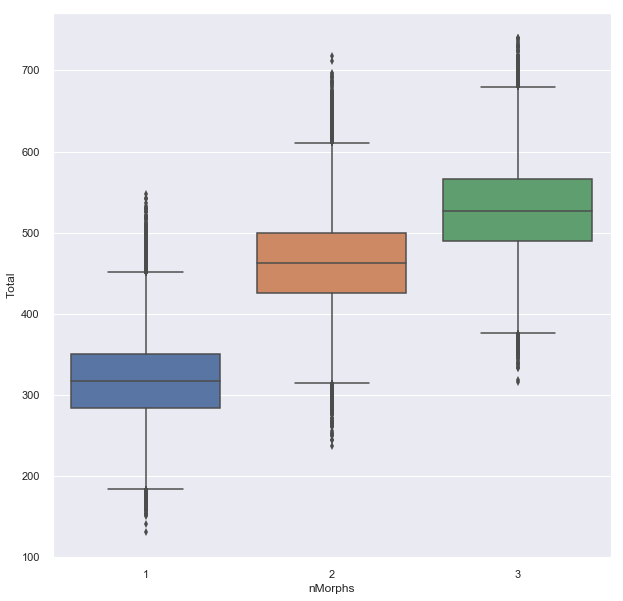

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
plot1 = sns.boxplot(x="nMorphs", y="Total", data=data, ax=ax)


In [51]:
data.set_index(["Pop", "Run", "Gen"], inplace=True)
pops = data.groupby("Pop")

finals = data.iloc[data.index.get_level_values('Gen')==100]

finalPops = finals.groupby("Pop")
for pop, popData in pops:
    print(pop, popData["Total"].max(), popData["Total"].min(), popData["Total"].mean())
    print(popData.describe())
    
finals.describe()

KeyError: 'Level Gen not found'

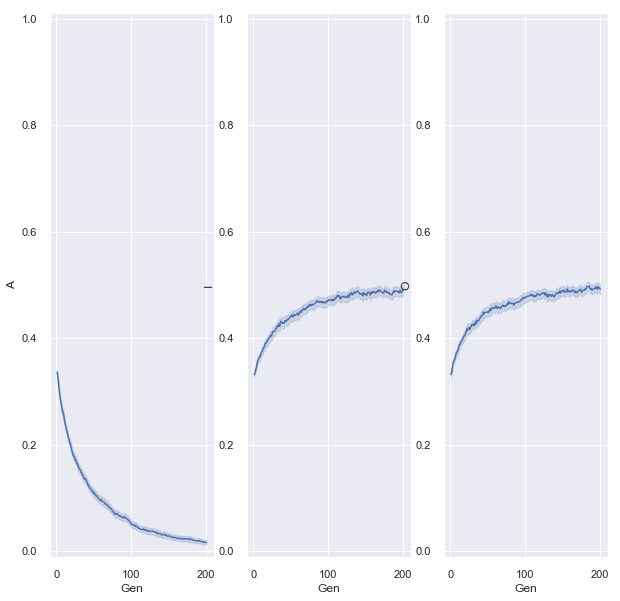

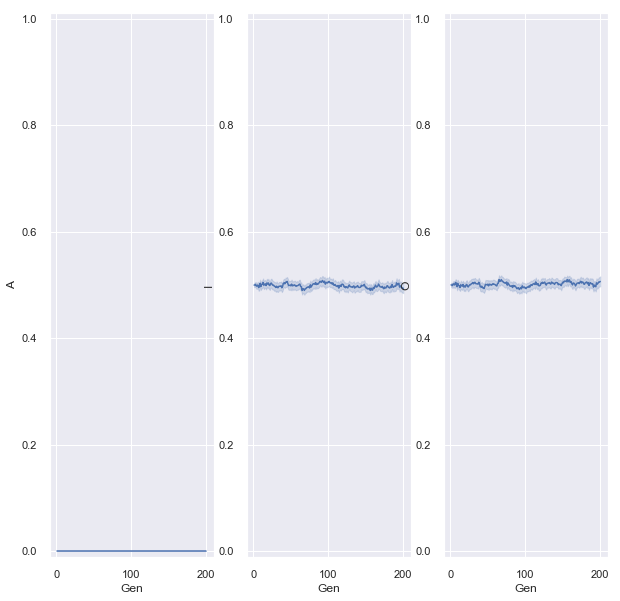

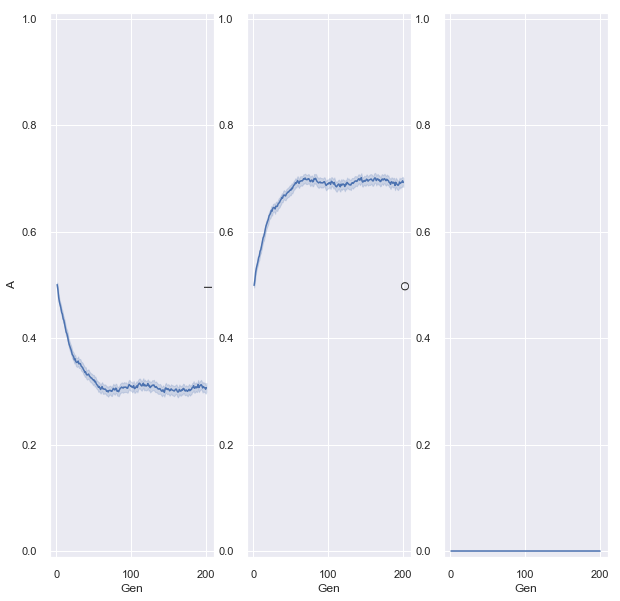

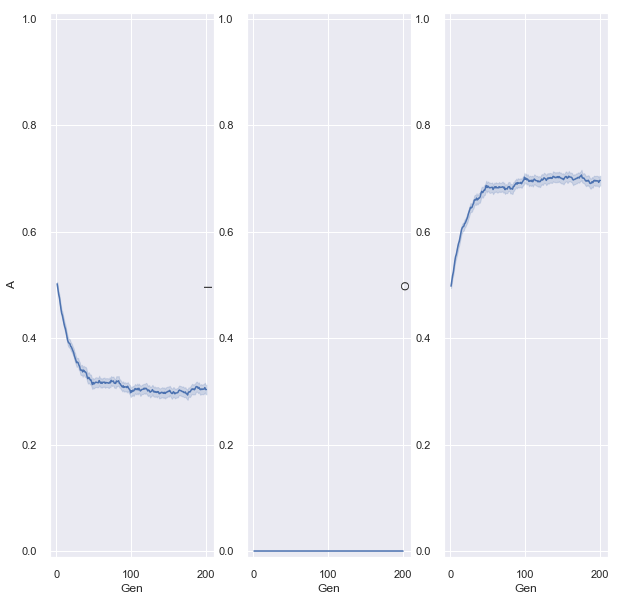

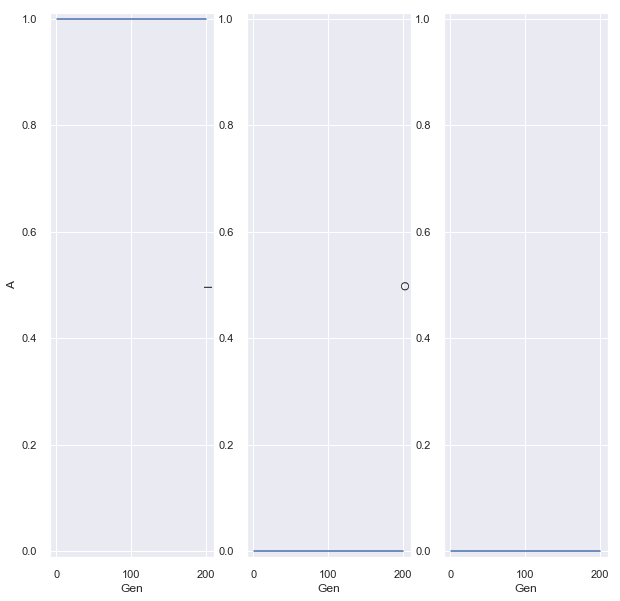

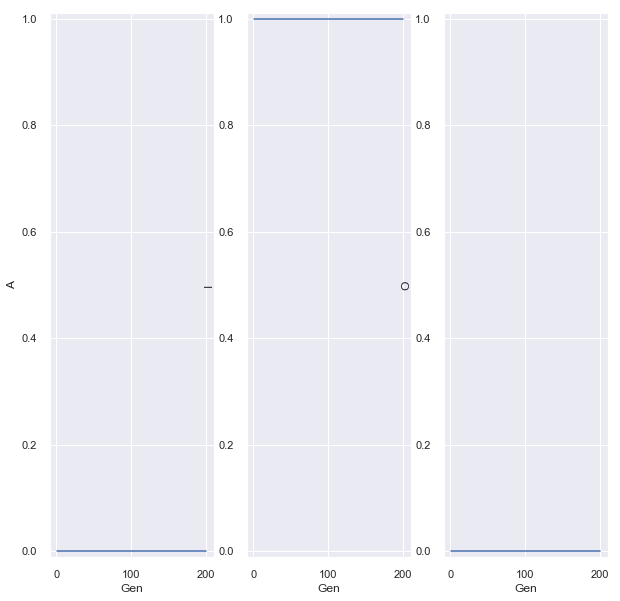

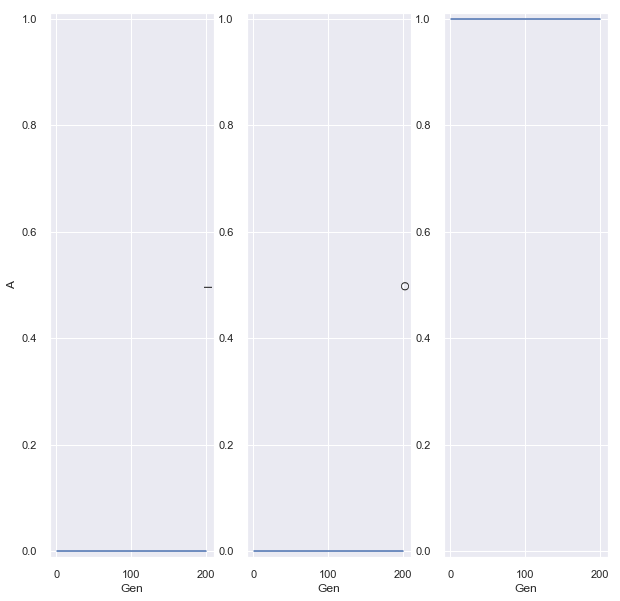

In [8]:
for pop, popData in pops:
    fig,axarray = plt.subplots(1,3, figsize=(10,10))
    plot1 = sns.lineplot(x="Gen", y="A", data=popData, ax=axarray[0])
    plot1.set(ylim=(-0.01, 1.01))
    plot2 = sns.lineplot(x="Gen", y="I", data=popData, ax=axarray[1])
    plot2.set(ylim=(-0.01, 1.01))
    plot3 = sns.lineplot(x="Gen", y="O", data=popData, ax=axarray[2])
    plot3.set(ylim=(-0.01, 1.01))


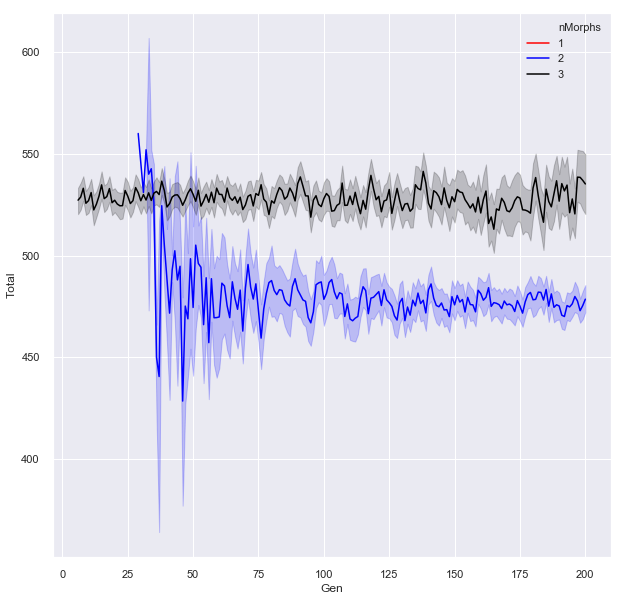

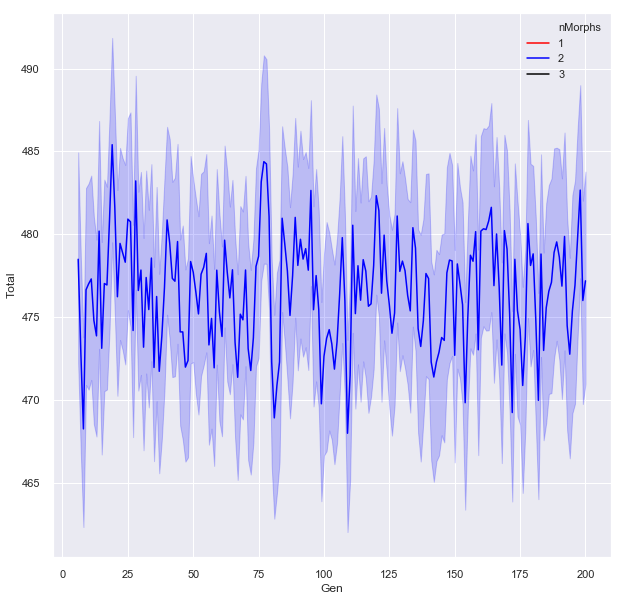

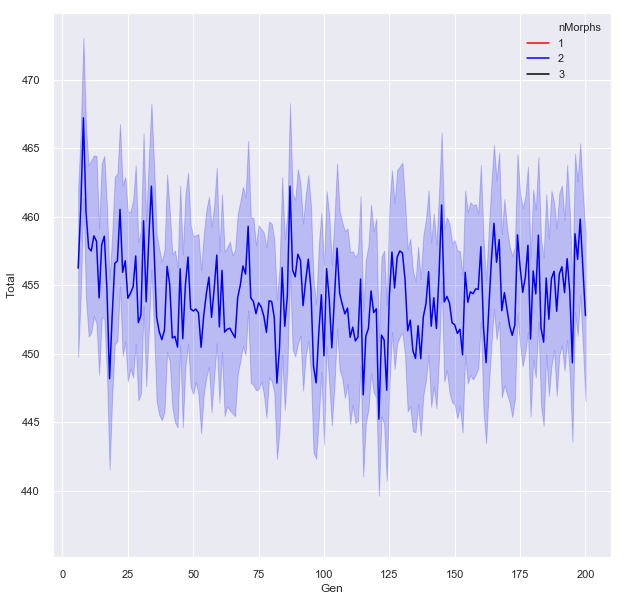

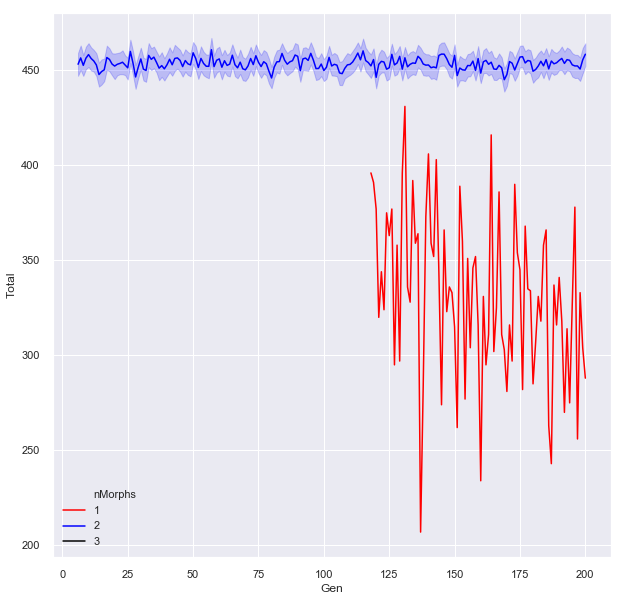

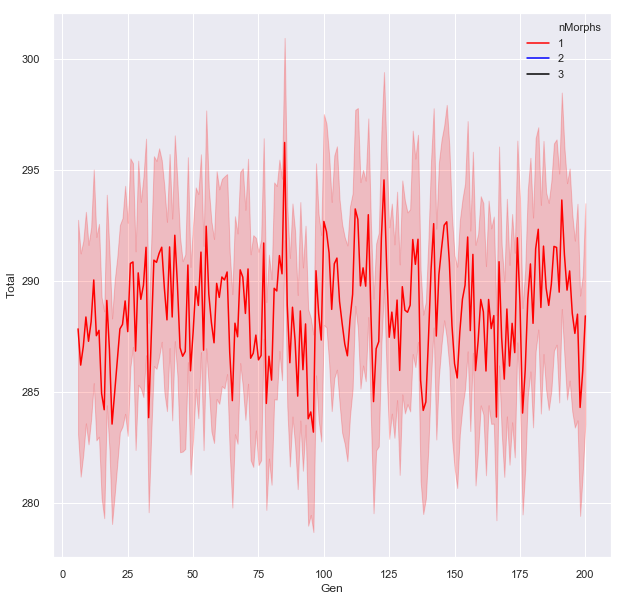

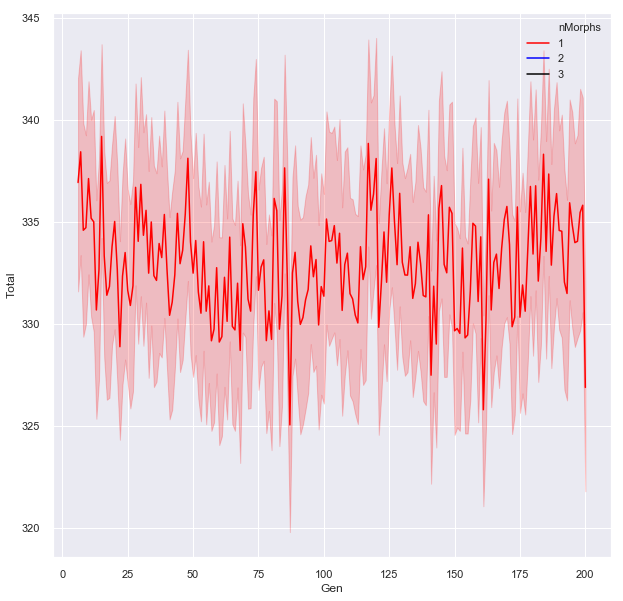

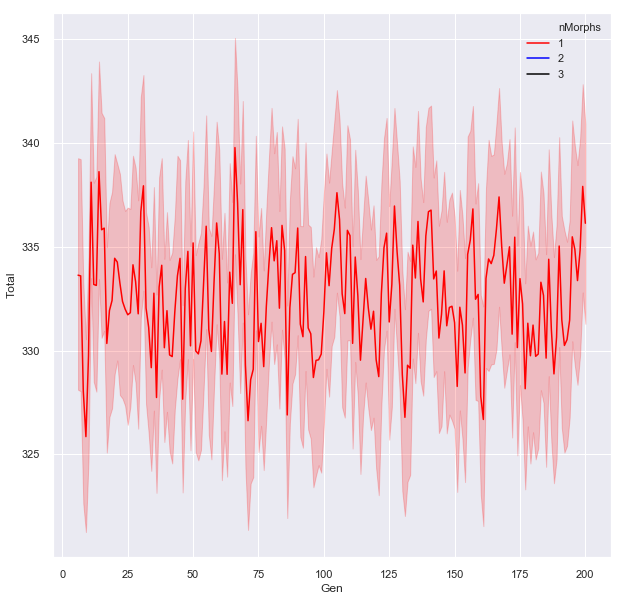

In [57]:
for pop, popData in pops:
    fig,axarray = plt.subplots(figsize=(10,10))
    plot1 = sns.lineplot(x="Gen", y="Total", hue="nMorphs", hue_order=[1,2,3], palette=["red", "blue", "black"], data=popData[popData["Gen"]>5], ax=axarray)

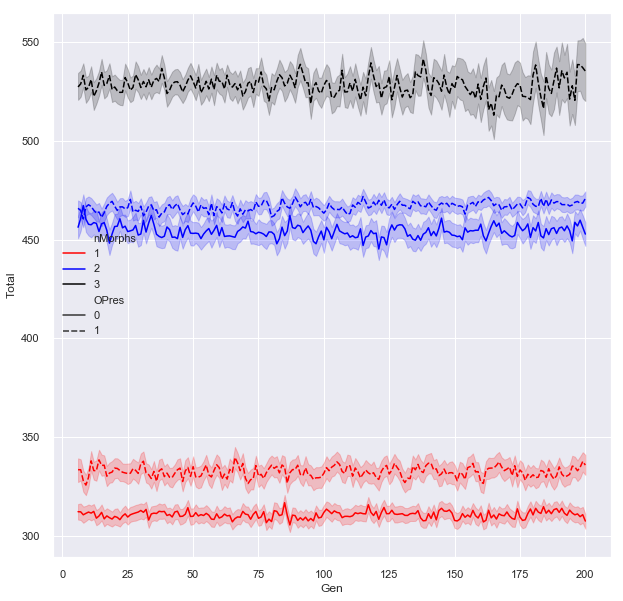

In [61]:
fig,axarray = plt.subplots(figsize=(10,10))
plot1 = sns.lineplot(x="Gen", y="Total", hue="nMorphs", hue_order=[1,2,3], palette=["red", "blue", "black"], style="OPres", data=data[data["Gen"]>5], ax=axarray)

MemoryError: 

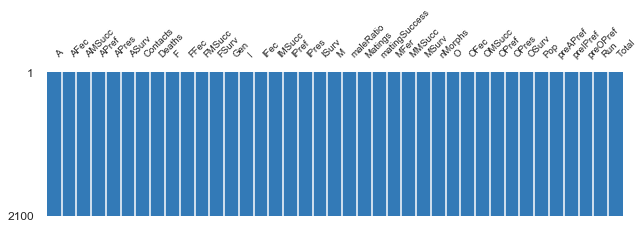

In [22]:
finals.profile_report()

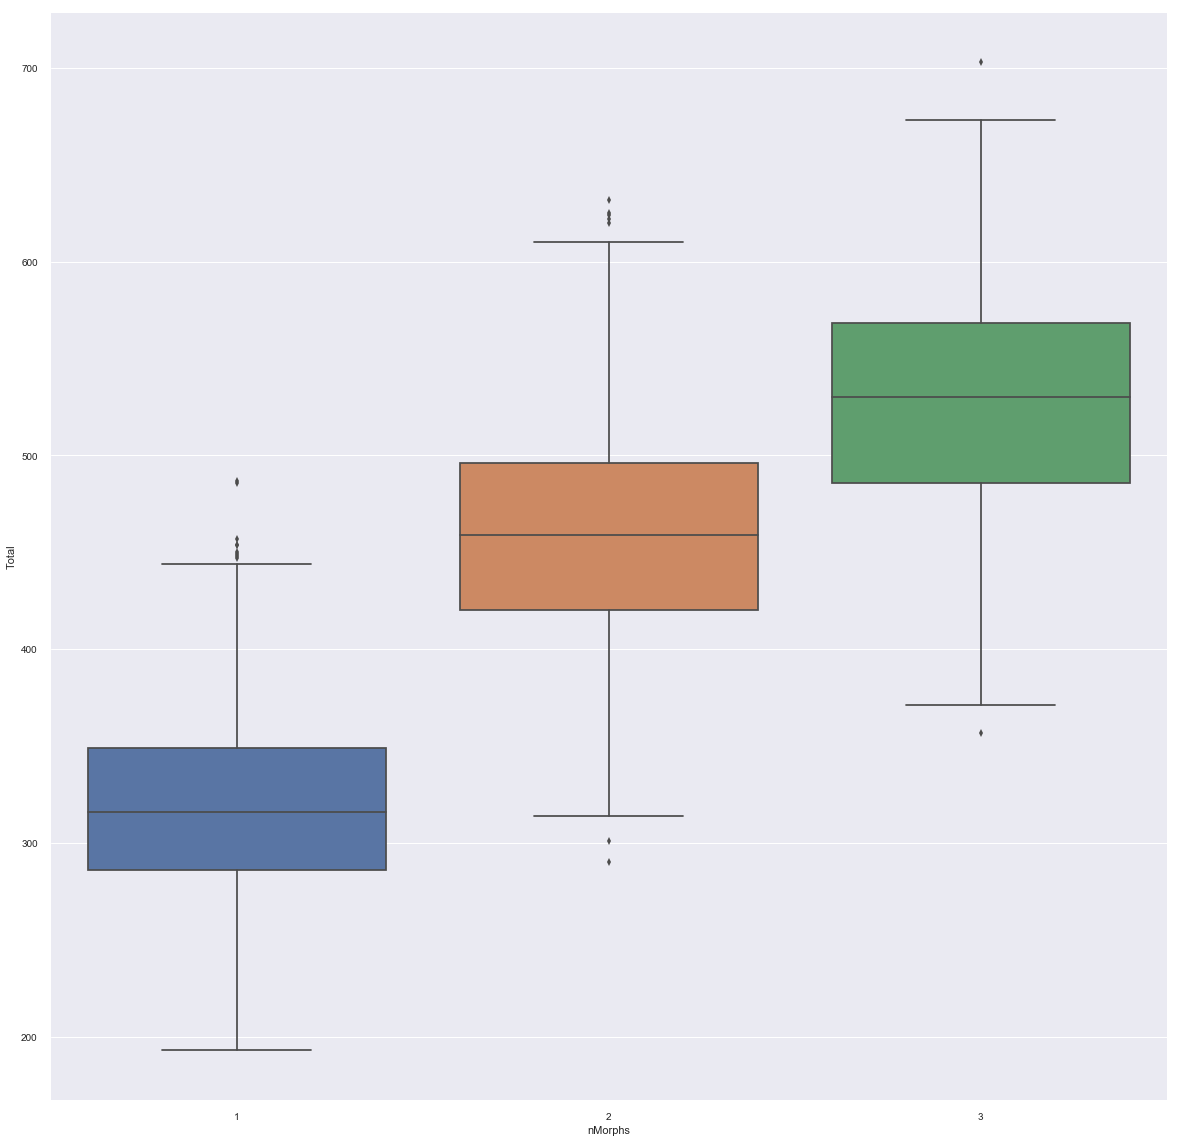

In [6]:
fig, ax = plt.subplots(figsize=(20,20))
plot1 = sns.boxplot(x="nMorphs", y="Total", data=finals, ax=ax)

In [65]:
monoA = monomorphic[(monomorphic["A"]>0) & (monomorphic["Gen"]==200)]
print(monoA.Total.mean())
monoI = monomorphic[(monomorphic["I"]>0) & (monomorphic["Gen"]==200)]
print(monoI.Total.mean())
monoO = monomorphic[(monomorphic["O"]>0) & (monomorphic["Gen"]==200)]
print(monoO.Total.mean())
print("A vs I")
print(stats.ttest_ind(monoA["Total"], monoI["Total"], equal_var=False))
print("A vs O")
print(stats.ttest_ind(monoA["Total"], monoO["Total"], equal_var=False))
print("I vs O")
print(stats.ttest_ind(monoO["Total"], monoI["Total"], equal_var=False))

288.42
326.8933333333333
335.9700996677741
A vs I
Ttest_indResult(statistic=-10.832799883438147, pvalue=4.331764212425213e-25)
A vs O
Ttest_indResult(statistic=-13.049639648431777, pvalue=1.97000070190868e-34)
I vs O
Ttest_indResult(statistic=2.5259623807574463, pvalue=0.01179546414989957)


In [62]:
print("A Present")
print(dimorphic[dimorphic["APres"]==1].Total.mean())
print("A Absent")
print(dimorphic[dimorphic["APres"]==0].Total.mean())
print("T test")
print(stats.ttest_ind(dimorphic[dimorphic["APres"]==1]["Total"], dimorphic[dimorphic["APres"]==0]["Total"], equal_var=False))

A Present
453.6053109921343
A Absent
476.60719448576396
T test
Ttest_indResult(statistic=-69.9084738332138, pvalue=0.0)


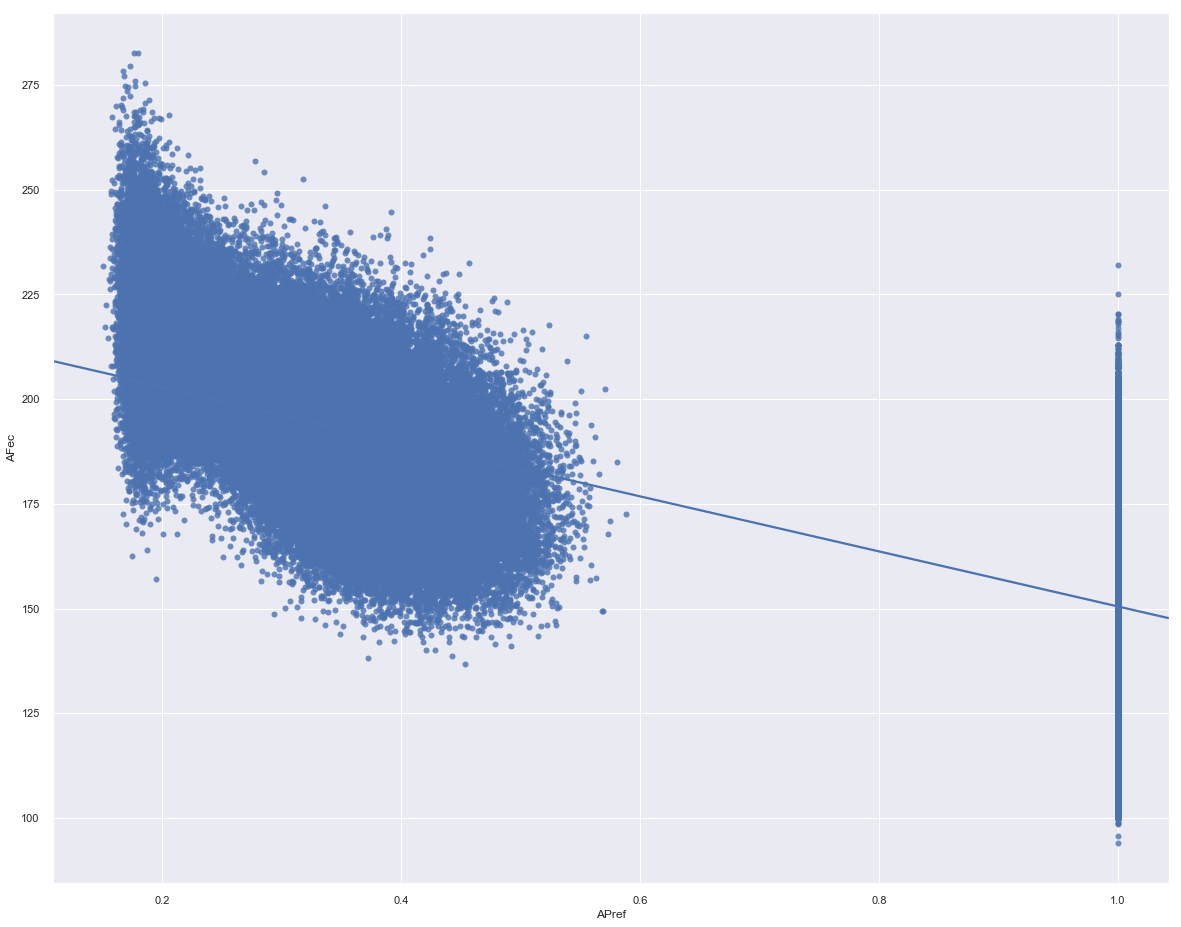

In [23]:
useData=data[(data["AFec"]!=0) & (data["A"]*data["F"]>5)]
fig, ax = plt.subplots(figsize=(20,16))
plot1 = sns.regplot(x="APref", y="AFec", data=useData, ax=ax)

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

                            OLS Regression Results                            
Dep. Variable:                   IFec   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.062e+05
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:25:59   Log-Likelihood:                -2094.5
No. Observations:                 516   AIC:                             4191.
Df Residuals:                     515   BIC:                             4195.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AFec           0.9964      0.003    325.846      0.0

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


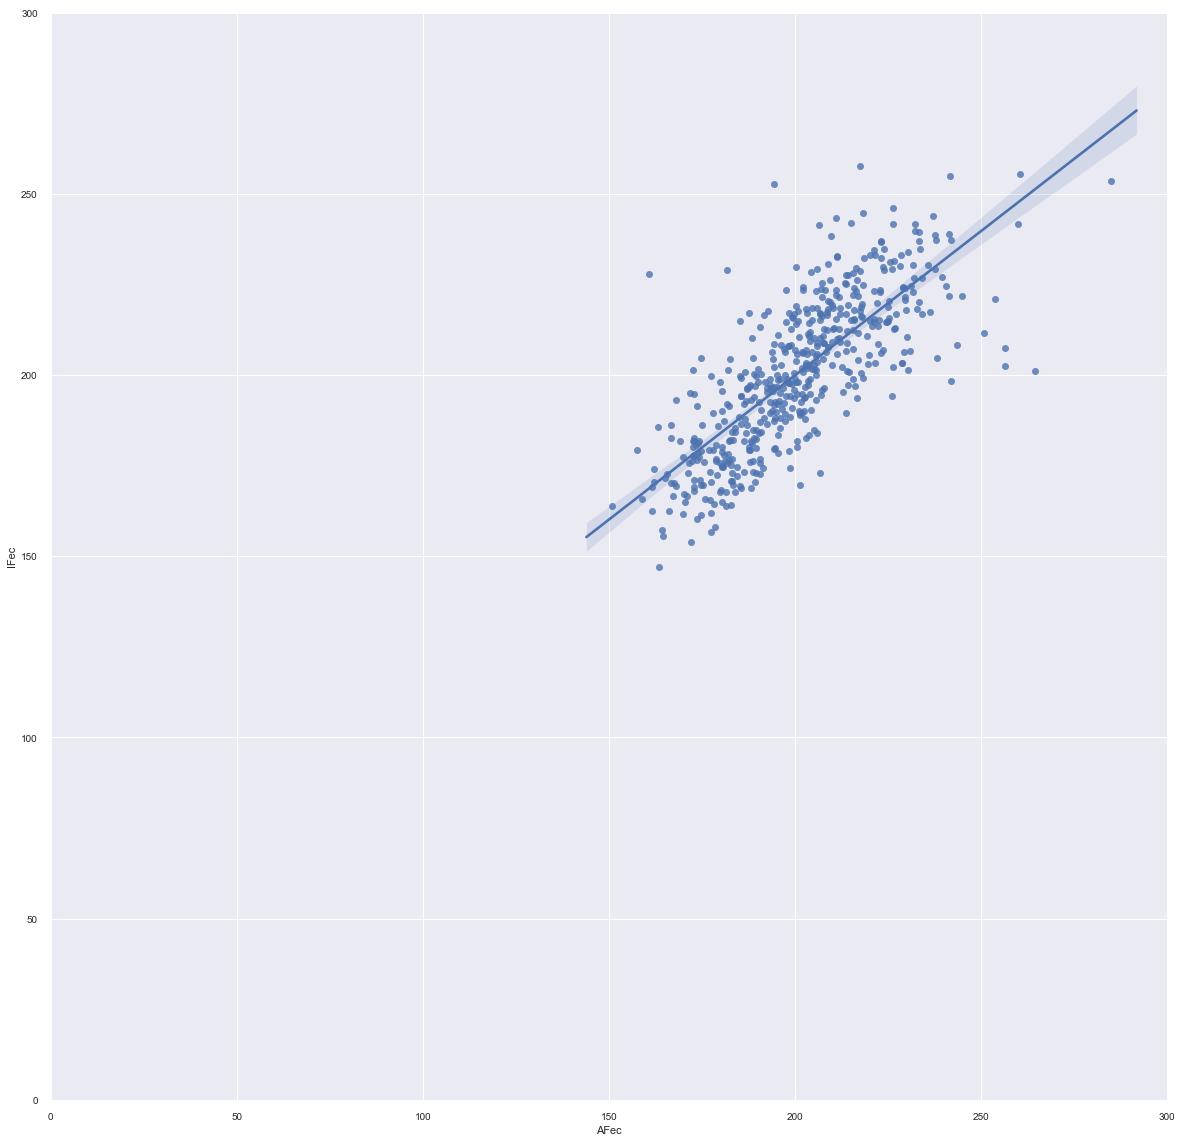

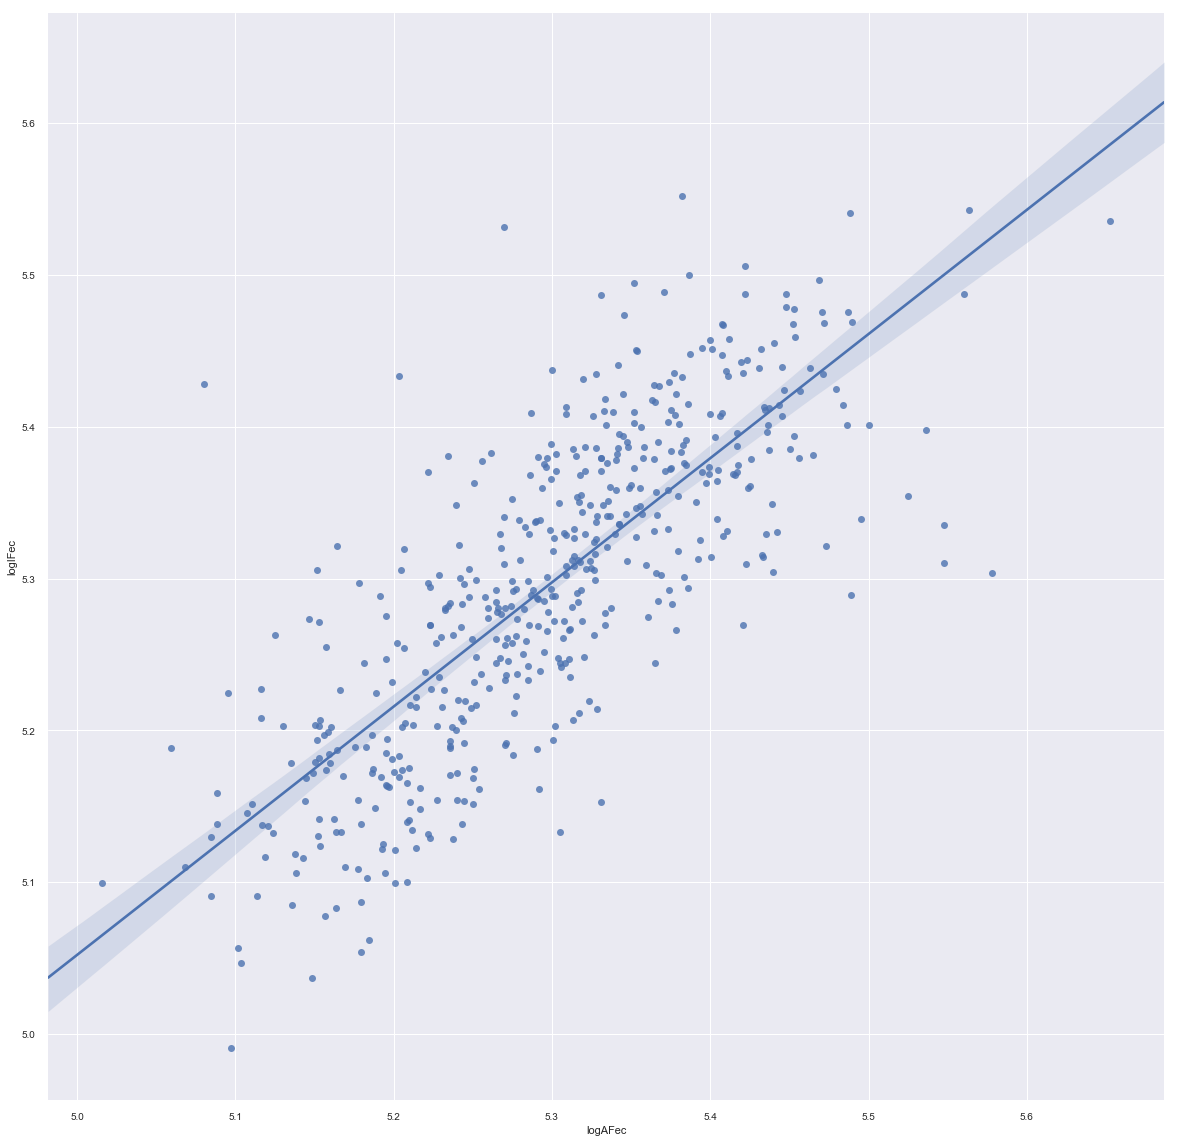

In [27]:
for par in ["AFec", "IFec", "OFec"]:
    data[par].replace(0, np.NaN, inplace=True)
    data["log{}".format(par)] = np.log(data[par])
for par in ["APref", "IPref", "OPref"]:
    data["{}adj".format(par)] = np.where((data["nMorphs"]==2) & (data[par]!=0), 0.7*(data[par]-0.1)/0.8+0.1, data[par])

#useData = data[(data["I"]!=0) & (data["A"]!=0)]
est = smf.ols(formula="IFec~AFec-1", data=data).fit()
print(est.summary())
fig, ax = plt.subplots(figsize=(20,20))
plot1 = sns.regplot(x="AFec", y="IFec", data=data)
plot1.set(ylim=(0,300), xlim=(0,300))
fig.show()
est2 = smf.ols(formula="logIFec~logAFec", data=data).fit()
print(est2.summary())
fig, ax=plt.subplots(figsize=(20,20))
plot1 = sns.regplot(x="logAFec", y="logIFec", data=data)
fig.show()

In [10]:
data = finals

In [11]:
useData = data[(data["A"]!=0) & (data["A"] != 1)]

def sigmoSym(x, Lambda, mult, intercept):
    f= 2*np.abs(x)-1
    f=(np.sign(f)*(np.abs(f)**Lambda)+1)/2
    f=(1-(np.sin(np.pi*f/2)**2+intercept))*mult
    return f

def sigmoCurve(x, stiffness, inflexion, mult, intercept):
    aInfl = 1/inflexion
    t=aInfl * x / (1+aInfl*x)
    f=sigmoSym(t, stiffness, mult, intercept)
    return(f)
popt, pcov = curve_fit(sigmoCurve, xdata=useData["A"], ydata=useData["AFec"], p0=[0.5, 0.5, useData["AFec"].median(), 0.1], bounds=([0,0,0,0], [1,1,500,1]))
print(popt)
predFec = useData["A"].apply(sigmoCurve, args=tuple(popt))
predFec.describe()
var = (useData["AFec"]-predFec)**2
var.describe()

[9.26059294e-01 1.00000000e+00 2.16084504e+02 2.46344513e-10]


count     816.000000
mean      203.879469
std       342.061525
min         0.000079
25%        21.911170
50%        88.583969
75%       254.646888
max      4763.968304
dtype: float64

In [12]:
def linEq(x, slope, intercept):
    f=slope*x+intercept
    return(f)
popt, pcov = curve_fit(linEq, xdata = useData["A"], ydata=useData["AFec"], bounds=([-500, 0], [500,500]))
print(popt)
linFec = useData["A"].apply(linEq, args=tuple(popt))
var = (useData["AFec"]-linFec)**2
var.describe()

[-101.60468237  221.4563785 ]


count     816.000000
mean      196.842763
std       328.961838
min         0.000315
25%        20.865486
50%        89.407830
75%       245.764968
max      4155.325450
dtype: float64

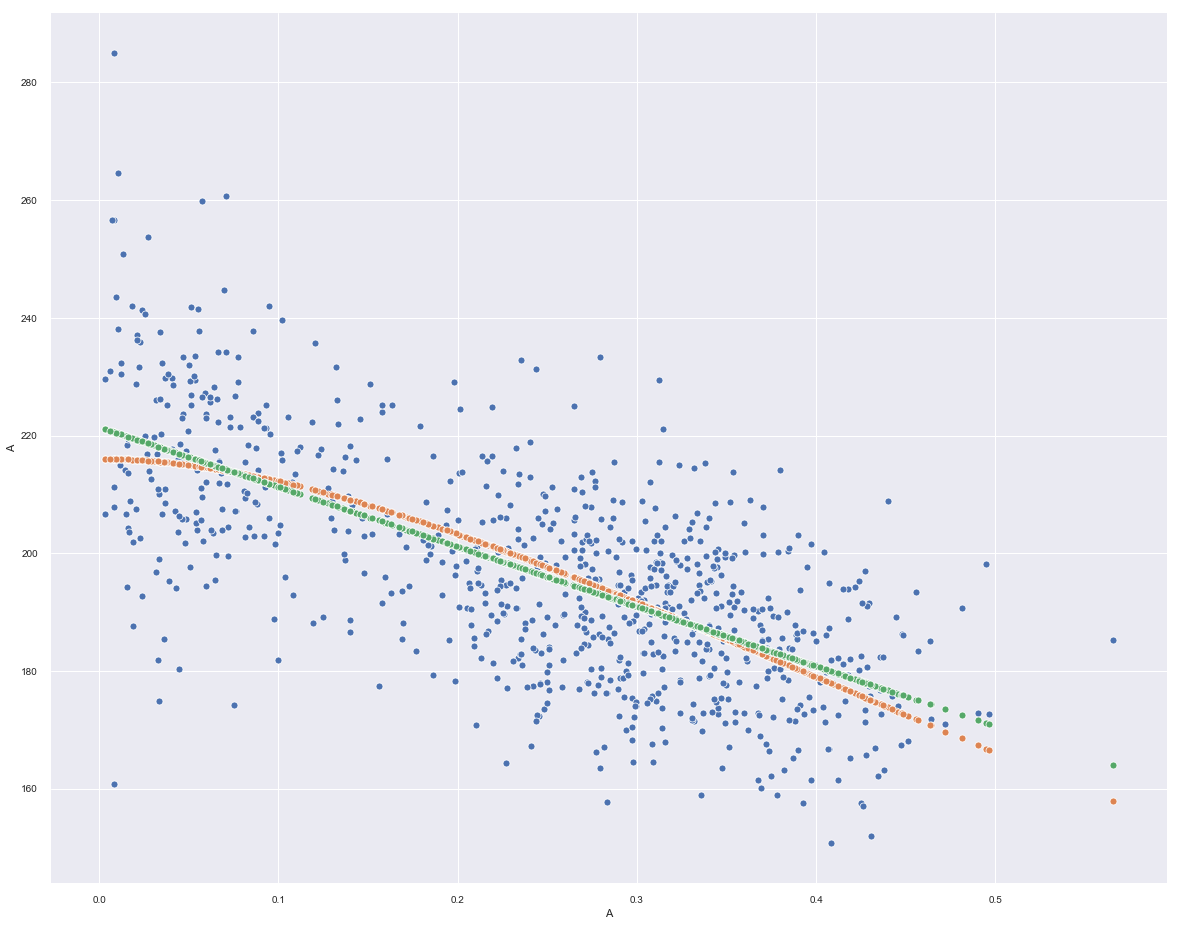

In [13]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="A", y="AFec", data=useData, ax=axarr)
plot2 = sns.scatterplot(x=useData["A"], y=predFec, ax=axarr)
plot3 = sns.scatterplot(x=useData["A"], y=linFec, ax=axarr)

In [30]:
test = 1-(useData["A"]*(useData["APref"]))
regFec = useData["A"].apply(sigmoCurve, args=(popt[0], popt[1],1, popt[3]))
fig, ax = plt.subplots(figsize=(20,16))
plot2 = sns.scatterplot(x=useData["A"], y=test, ax=ax)
plot1 = sns.scatterplot(x=useData["A"], y=regFec, ax=ax)


IndexError: index 3 is out of bounds for axis 0 with size 2

In [15]:
useData = data[(data["I"]!=0) & (data["I"] !=1)]

popt, pcov = curve_fit(sigmoCurve, xdata=useData["I"], ydata=useData["IFec"], p0=[0.5, 1, useData["IFec"].median(),0.1], bounds=([0,0,0,0], [1,10,500,1]))
print(popt)
predFec = useData["I"].apply(sigmoCurve, args=tuple(popt))
predFec.describe()
sigVar = (useData["IFec"]-predFec)**2
print(sigVar.describe())
popt, pcov = curve_fit(linEq, xdata=useData["I"], ydata=useData["IFec"], bounds=([-500, 0], [500,500]))
print(popt)
linFec = useData["I"].apply(linEq, args=tuple(popt))
linVar = (useData["IFec"]-linFec)**2
print(linVar.describe())

[1.00000000e+00 1.90464234e+00 2.25538578e+02 1.03031590e-10]
count     900.000000
mean      282.131556
std       394.838487
min         0.000072
25%        31.013734
50%       119.734203
75%       386.038763
max      2679.005890
dtype: float64
[-71.2321256  237.73681953]
count     900.000000
mean      281.155857
std       393.821626
min         0.000260
25%        31.707305
50%       118.596640
75%       387.881090
max      2699.990319
dtype: float64


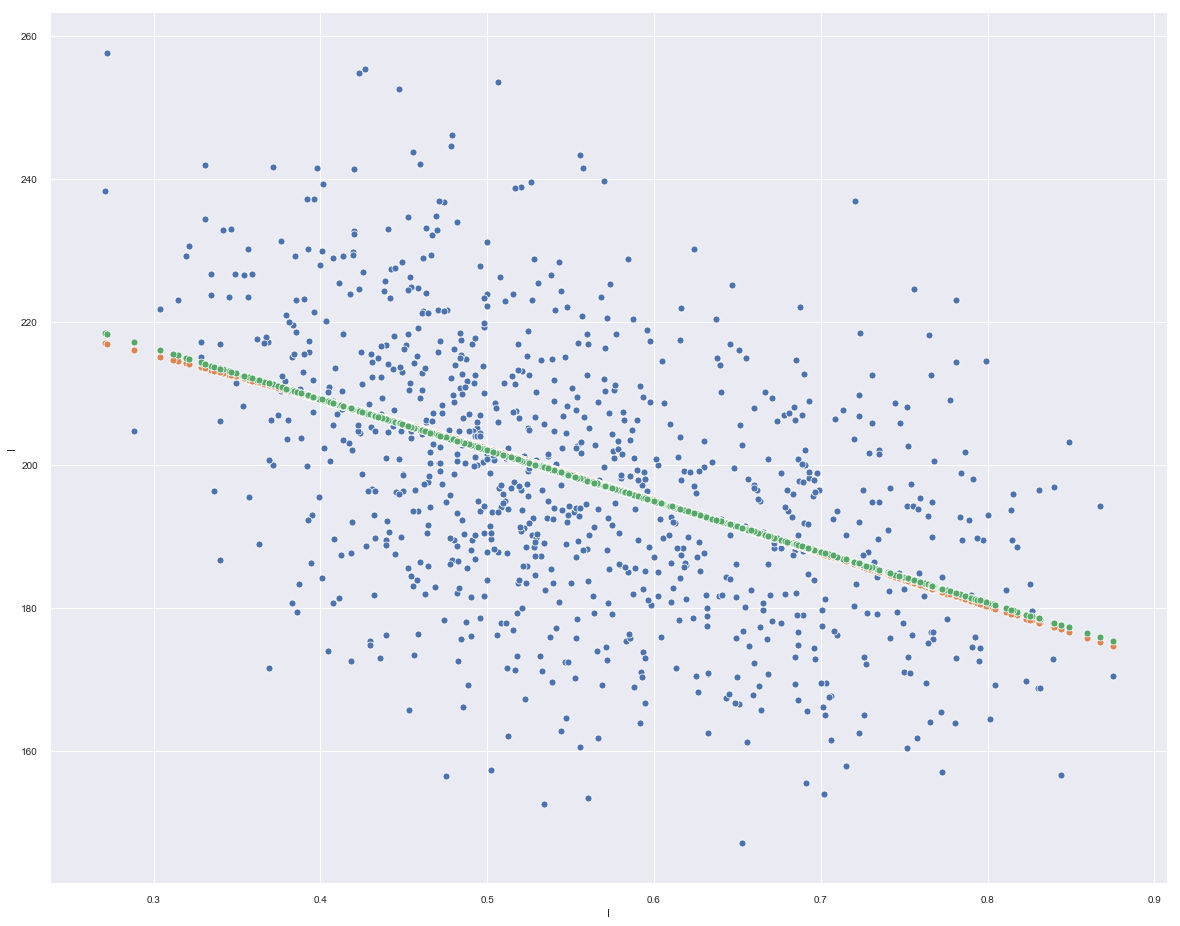

In [16]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="I", y="IFec", data=useData, ax=axarr)
plot2 = sns.scatterplot(x=useData["I"], y=predFec, ax=axarr)
plot3 = sns.scatterplot(x=useData["I"], y=linFec, ax=axarr)

In [33]:
regFec = useData["I"].apply(sigmoCurve, args=(popt[0], popt[1],1,popt[3]))
fig, ax = plt.subplots(figsize=(20,16))
plot1 = sns.scatterplot(x=useData["I"], y=regFec, ax=ax)

IndexError: index 3 is out of bounds for axis 0 with size 2

In [17]:
useData = data[(data["O"]!=0) & (data["O"]!=1)]


popt, pcov = curve_fit(sigmoCurve, xdata=useData["O"], ydata=useData["OFec"], p0=[0.5, 1, useData["OFec"].median(), 0.1], bounds=([0,0,0,0], [1,2,500,1]))
print(popt)
predFec = useData["O"].apply(sigmoCurve, args=tuple(popt))
predFec.describe()
sigVar = (useData["OFec"]-predFec)**2
print(sigVar.describe())
popt, pcov = curve_fit(linEq, xdata=useData["O"], ydata=useData["OFec"], bounds=([-500, 0], [500,500]))
print(popt)
linFec = useData["O"].apply(linEq, args=tuple(popt))
linVar = (useData["OFec"]-linFec)**2
print(linVar.describe())

[1.00000000e+00 1.84864454e+00 2.26788067e+02 1.07634885e-11]
count     900.000000
mean      278.212726
std       399.861040
min         0.000144
25%        22.364336
50%       117.343138
75%       363.152615
max      3021.704184
dtype: float64
[-74.279187   239.29778253]
count     900.000000
mean      277.744218
std       399.131702
min         0.002583
25%        22.114964
50%       116.326231
75%       358.764832
max      3042.353968
dtype: float64


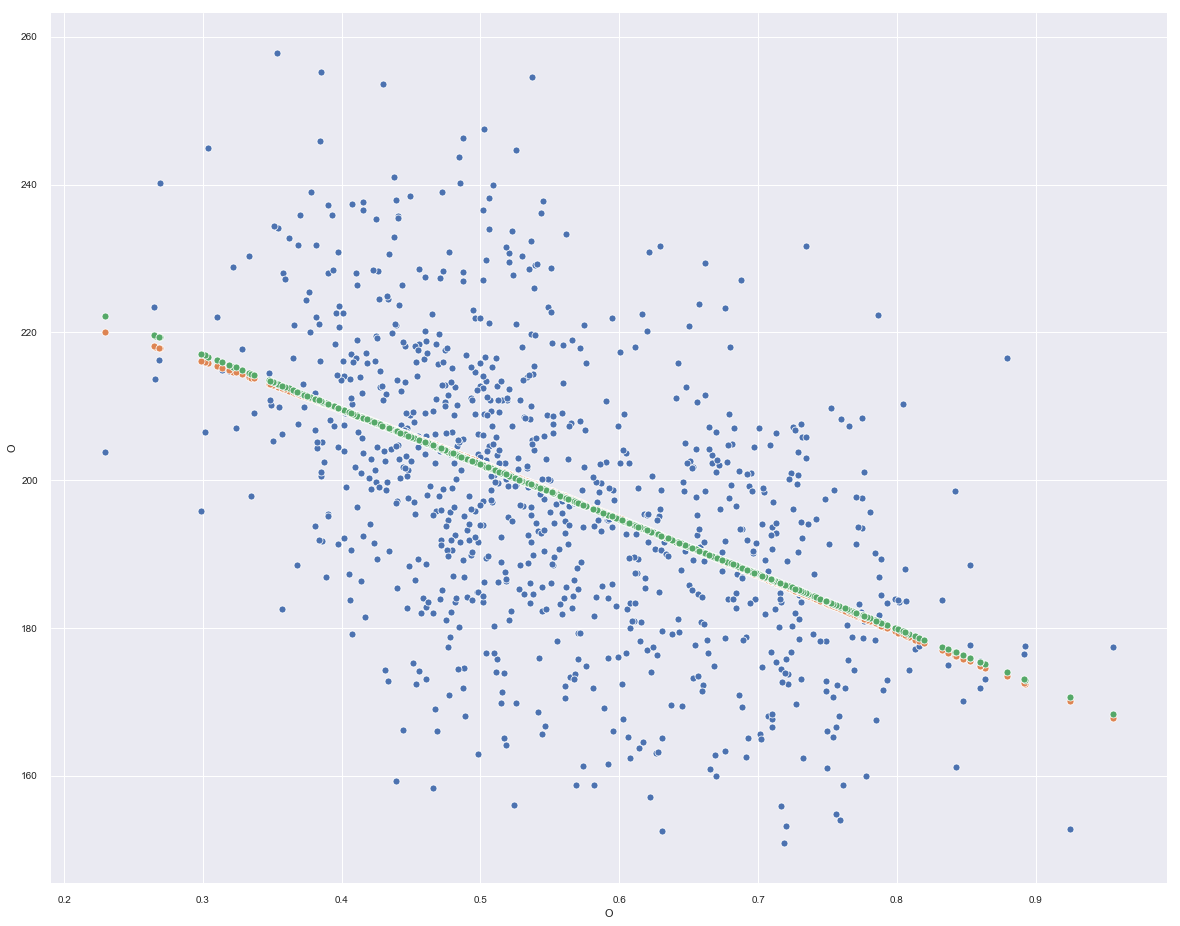

In [18]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="O", y="OFec", data=useData, ax=axarr)
plot2 = sns.scatterplot(x=useData["O"], y=predFec, ax=axarr)
plot3 = sns.scatterplot(x=useData["O"], y=linFec, ax=axarr)

In [36]:
regFec = useData["O"].apply(sigmoCurve, args=(popt[0], popt[1],1, popt[3]))
fig, ax = plt.subplots(figsize=(20,16))
plot1 = sns.scatterplot(x=useData["O"], y=regFec, ax=ax)

IndexError: index 3 is out of bounds for axis 0 with size 2

In [19]:
def sigmoSym(x, Lambda, mult, intercept):
    f= 2*np.abs(x)-1
    f=(np.sign(f)*(np.abs(f)**Lambda)+1)/2
    f=(np.sin(np.pi*f/2)**2+intercept)*mult
    return f

useData = data[(data["A"]!=0) & (data["A"] != 1)]
popt, pcov = curve_fit(sigmoCurve, xdata=useData["A"], ydata=useData["APref"], p0=[0.5, 0.5, useData["APref"].median(), 0.1], bounds=([0,0,0,0], [1,2,1,1]))
print(popt)
sigPref = useData["A"].apply(sigmoCurve, args=tuple(popt))
sigPref.describe()
sigVar = (useData["APref"]-sigPref)**2
print(sigVar.describe())
popt,pcov = curve_fit(linEq, xdata=useData["A"], ydata=useData["APref"], bounds=([0,0],[1,1]))
print(popt)
linPref = useData["A"].apply(linEq, args=tuple(popt))
linVar = (useData["APref"]-linPref)**2
print(linVar.describe())


[0.9527815  0.42229886 0.5083297  0.33858043]
count    8.160000e+02
mean     1.814889e-04
std      3.281886e-04
min      2.468161e-09
25%      1.483895e-05
50%      6.826732e-05
75%      2.138592e-04
max      2.800363e-03
dtype: float64
[0.65099816 0.15542483]
count    8.160000e+02
mean     1.962330e-04
std      3.261765e-04
min      4.350871e-10
25%      1.540421e-05
50%      8.168239e-05
75%      2.349196e-04
max      2.865188e-03
dtype: float64


[(0, 1)]

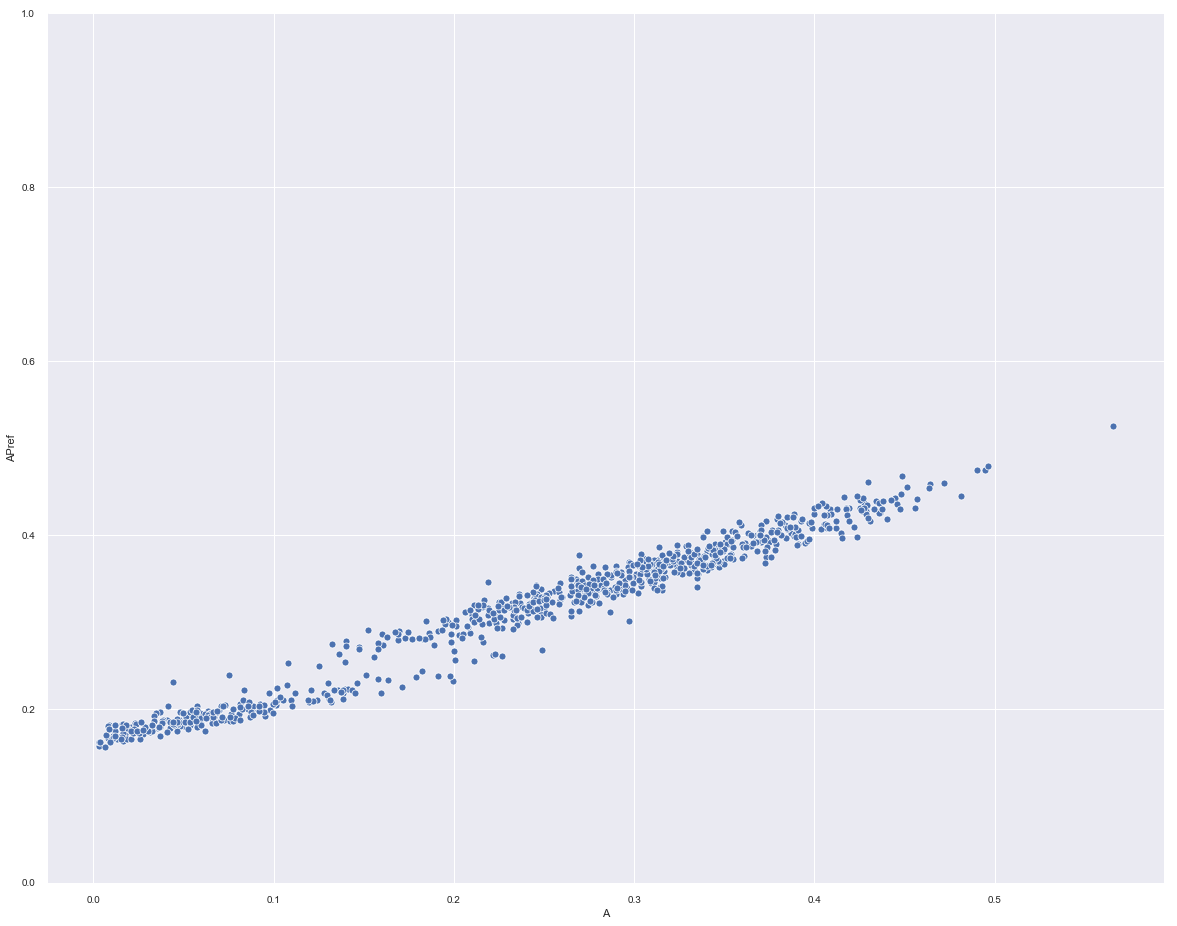

In [21]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="A", y="APref", data=useData, ax=axarr)
plot1.set(ylim=(0,1))
#plot2 = sns.scatterplot(x=useData["A"], y=sigPref, ax=axarr)
#plot3 = sns.scatterplot(x=useData["A"], y=linPref, ax=axarr)

1
[0.85039685 0.22653129 0.1739891  1.        ]
count    2.160000e+02
mean     5.166591e-05
std      7.704845e-05
min      2.292258e-08
25%      4.855206e-06
50%      2.386757e-05
75%      6.533878e-05
max      5.430232e-04
dtype: float64
[0.39932881 0.16606251]
count    2.160000e+02
mean     4.774348e-05
std      6.741180e-05
min      2.923264e-08
25%      4.975290e-06
50%      2.180829e-05
75%      6.736242e-05
max      4.691950e-04
dtype: float64
2
3
[0.82851477 0.42296093 0.42585247 0.50553996]
count    3.000000e+02
mean     1.545876e-04
std      2.207456e-04
min      7.829685e-09
25%      1.684973e-05
50%      7.557877e-05
75%      1.961350e-04
max      1.692466e-03
dtype: float64
[0.58406203 0.1782028 ]
count    3.000000e+02
mean     1.533664e-04
std      2.177869e-04
min      5.864641e-09
25%      1.779285e-05
50%      7.349942e-05
75%      1.999843e-04
max      1.679936e-03
dtype: float64
4
[0.8257141  0.36246873 0.36295319 0.58257112]
count    3.000000e+02
mean     1.145704e-0

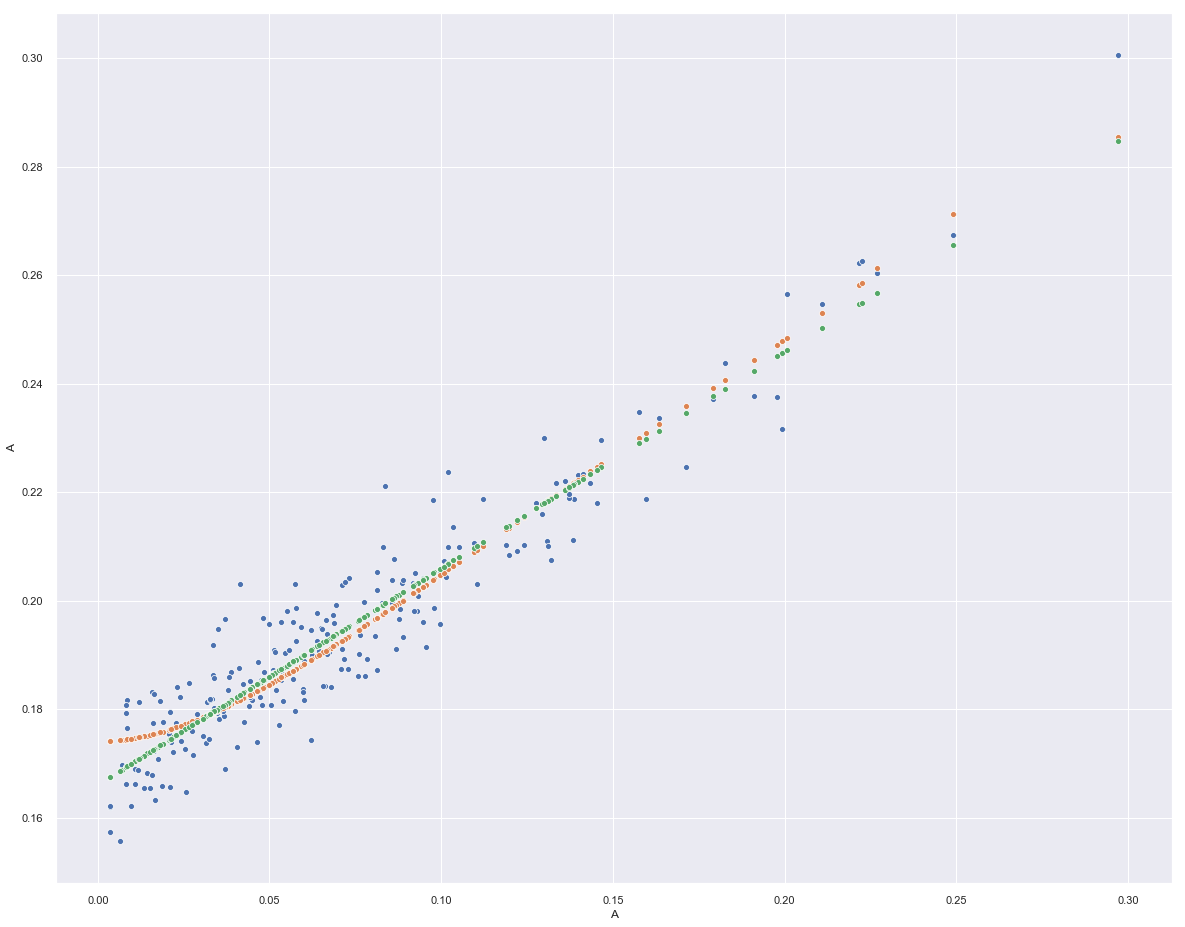

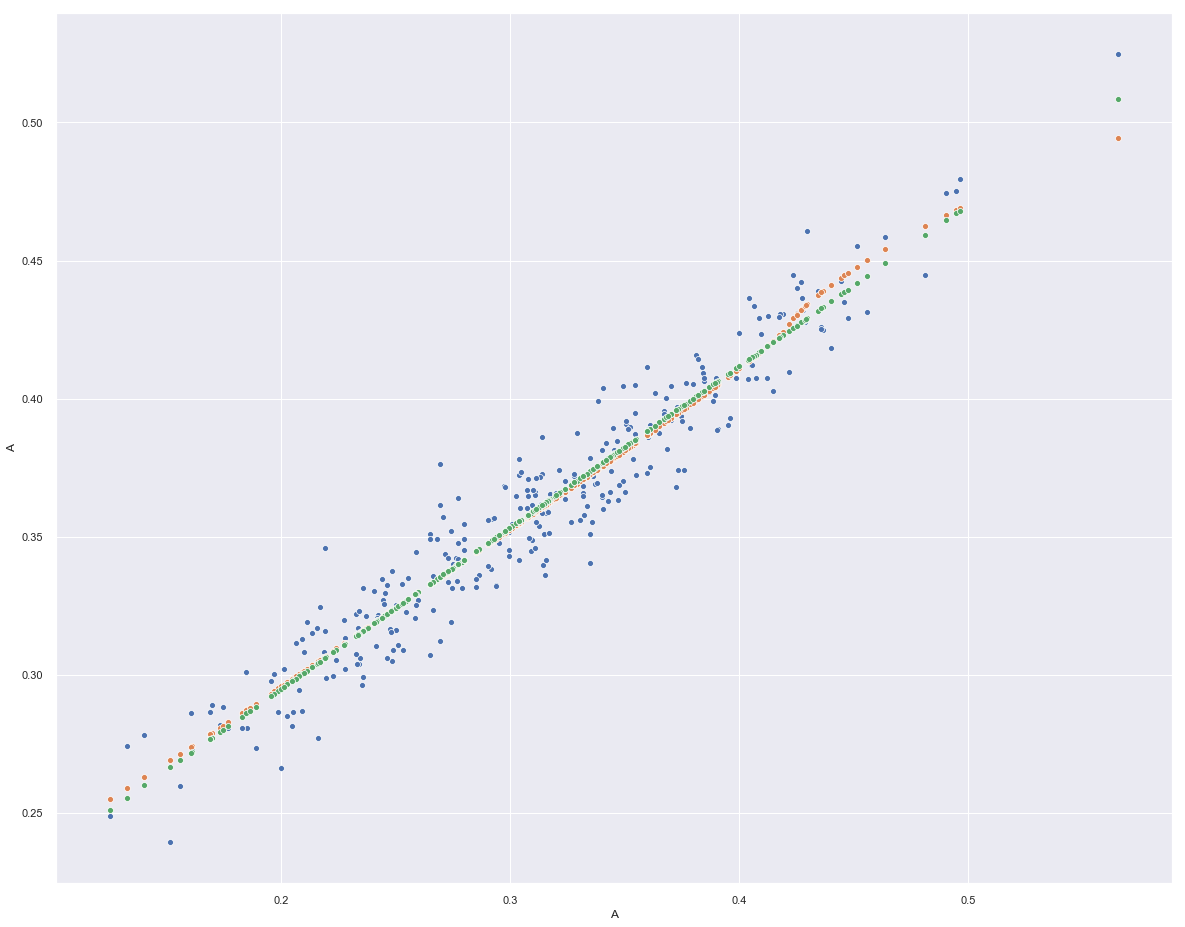

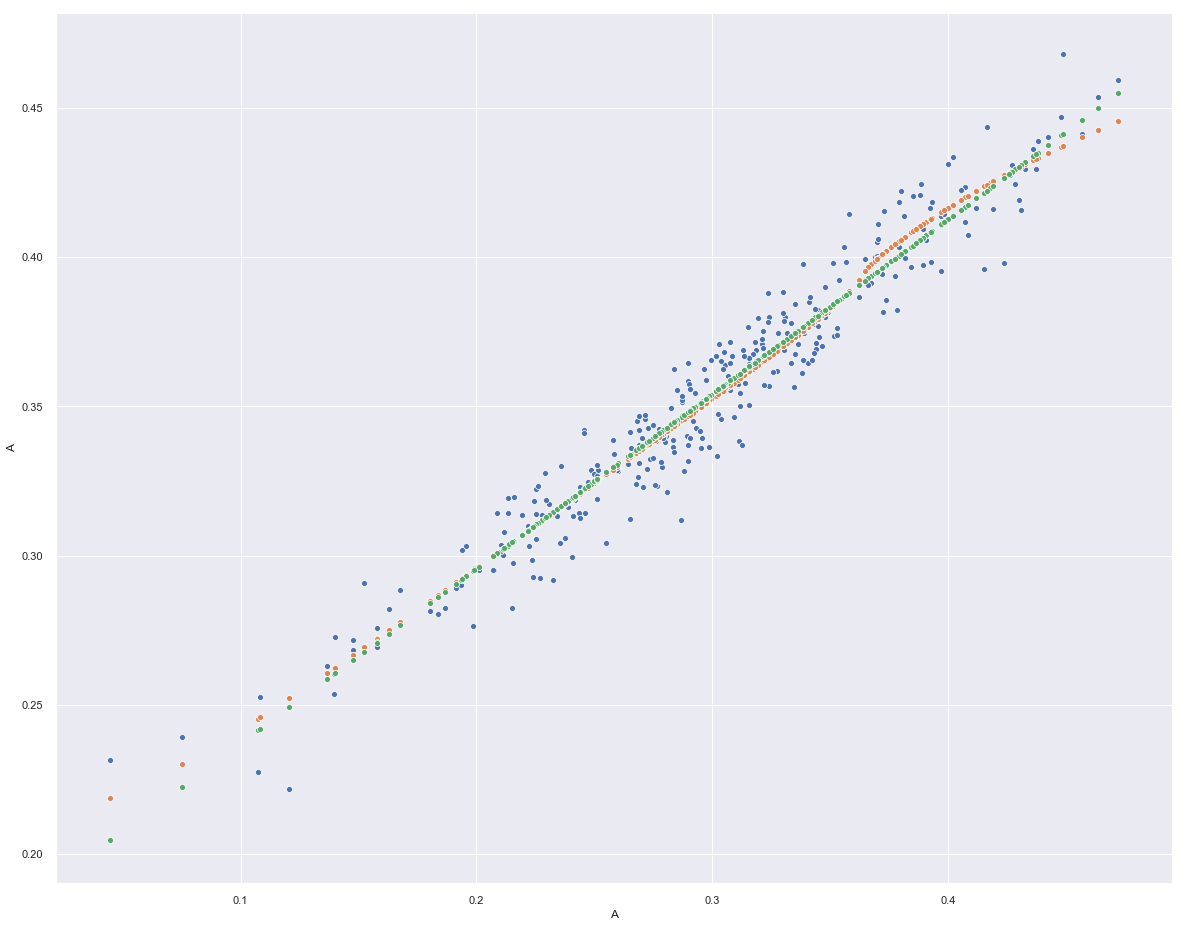

In [40]:
for pop, popData in finalPops:
    print(pop)
    useData = popData[(popData["A"]!=0) & (popData["A"] != 1)]
    if len(useData != 0):
        popt, pcov = curve_fit(sigmoCurve, xdata=useData["A"], ydata=useData["APref"], p0=[0.5, 0.5, useData["APref"].median(), 0.1], bounds=([0,0,0,0], [1,2,1,1]))
        print(popt)
        sigPref = useData["A"].apply(sigmoCurve, args=tuple(popt))
        sigPref.describe()
        sigVar = (useData["APref"]-sigPref)**2
        print(sigVar.describe())
        popt,pcov = curve_fit(linEq, xdata=useData["A"], ydata=useData["APref"], bounds=([0,0],[1,1]))
        print(popt)
        linPref = useData["A"].apply(linEq, args=tuple(popt))
        linVar = (useData["APref"]-linPref)**2
        print(linVar.describe())
        fig, axarr = plt.subplots(1,1, figsize=(20,16))
        plot1=sns.scatterplot(x="A", y="APref", data=useData, ax=axarr)
        #plot1.set(ylim=(0,1))
        plot2 = sns.scatterplot(x=useData["A"], y=sigPref, ax=axarr)
        plot3 = sns.scatterplot(x=useData["A"], y=linPref, ax=axarr)


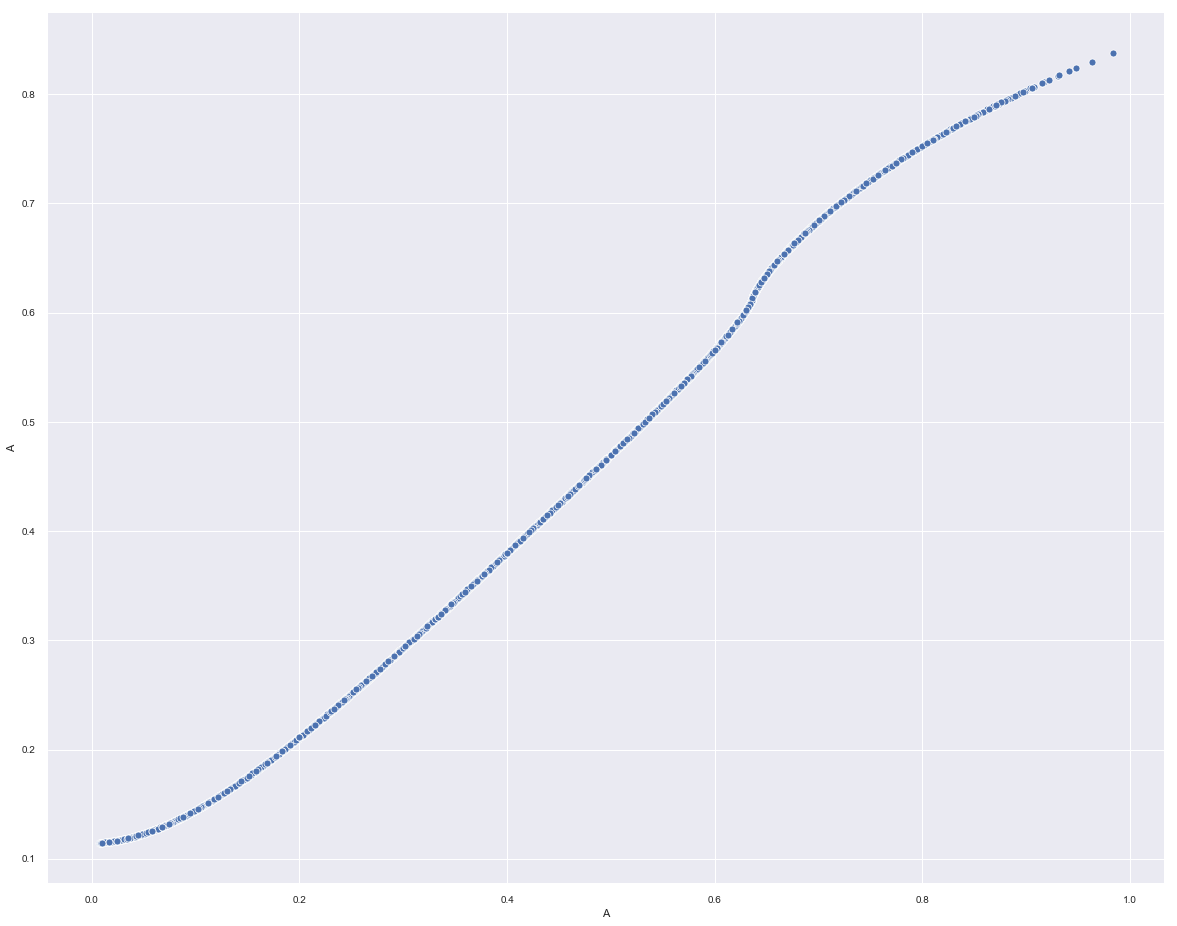

In [15]:
regFec = useData["A"].apply(sigmoCurve, args=(popt[0], popt[1],1, popt[3]))
fig, ax = plt.subplots(figsize=(20,16))
plot1 = sns.scatterplot(x=useData["A"], y=regFec, ax=ax)

[0.57173202 0.72661376 1.84265503 0.00512429]


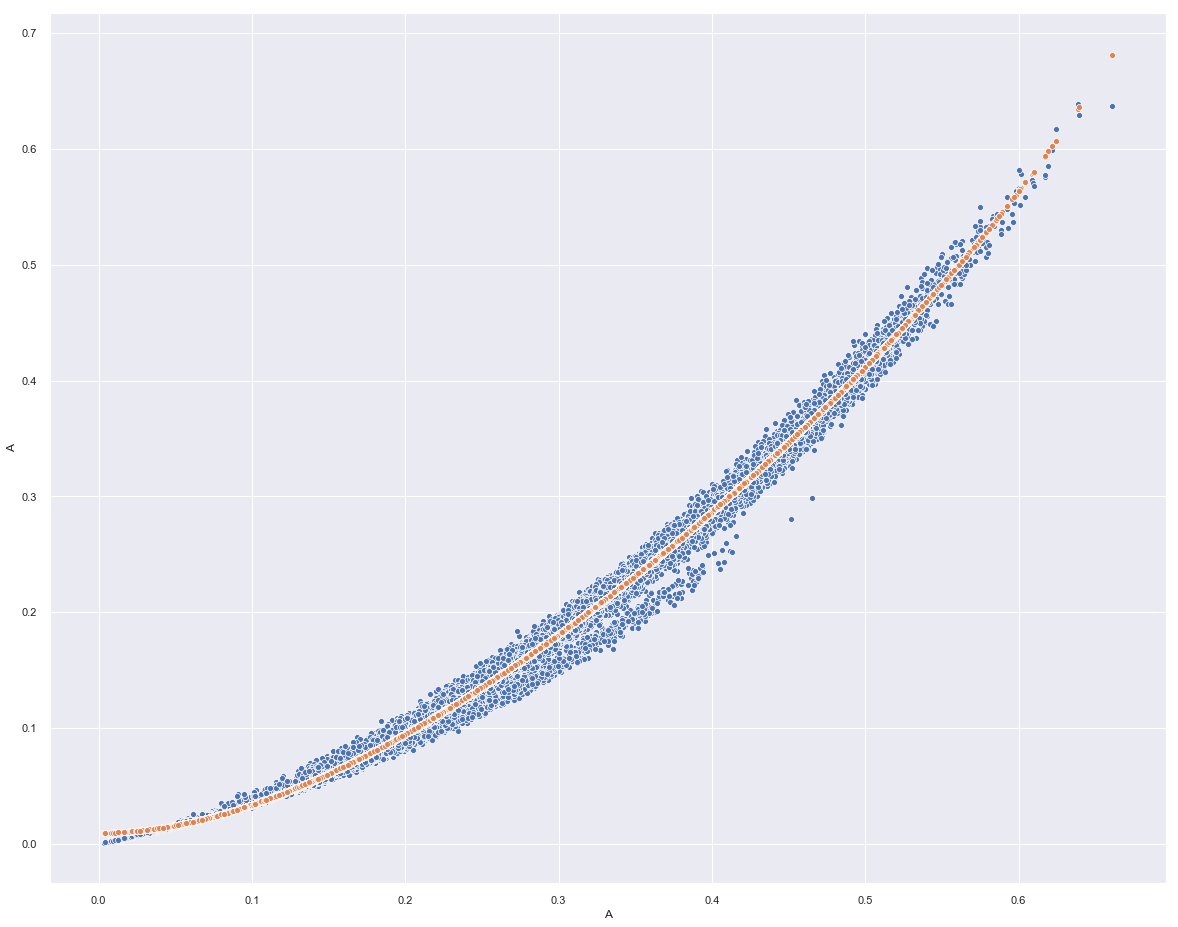

In [31]:
predFec = ((useData["APref"]/useData["APref"].max())*useData["A"])
popt, pcov = curve_fit(sigmoCurve, xdata=useData["A"], ydata=predFec, p0=[0.5, 0.5, predFec.median(), 0.1], bounds=([0,0,0,0], [1,1,np.inf,1]))
print(popt)
regFec = useData["A"].apply(sigmoCurve, args=tuple(popt))
regFec.describe()


fig, ax = plt.subplots(figsize=(20,16))
plot1 = sns.scatterplot(x=useData["A"], y=predFec, ax=ax)
plot2 = sns.scatterplot(x=useData["A"], y=regFec, ax=ax)

In [22]:
useData = data[(data["I"]!=0) & (data["I"] !=1)]

popt, pcov = curve_fit(sigmoCurve, xdata=useData["I"], ydata=useData["IPref"], p0=[0.5, 1, 1,0], bounds=([0,0,0.99,0], [1,2,1,1]))
print(popt)
sigPref = useData["I"].apply(sigmoCurve, args=tuple(popt))
sigPref.describe()
sigVar = (useData["IPref"]-sigPref)**2
print(sigVar.describe())
popt,pcov = curve_fit(linEq, xdata=useData["I"], ydata=useData["IPref"], bounds=([0,0],[1,1]))
print(popt)
linPref = useData["I"].apply(linEq, args=tuple(popt))
linVar = (useData["IPref"]-linPref)**2
print(linVar.describe())

[0.8964012  0.64724998 0.99       0.10923751]
count    9.000000e+02
mean     1.081054e-03
std      1.694632e-03
min      9.377093e-10
25%      7.738345e-05
50%      3.912161e-04
75%      1.332850e-03
max      1.316913e-02
dtype: float64
[0.79325007 0.08364643]
count    9.000000e+02
mean     1.099839e-03
std      1.591842e-03
min      2.578367e-09
25%      1.254747e-04
50%      5.000326e-04
75%      1.364210e-03
max      1.129887e-02
dtype: float64


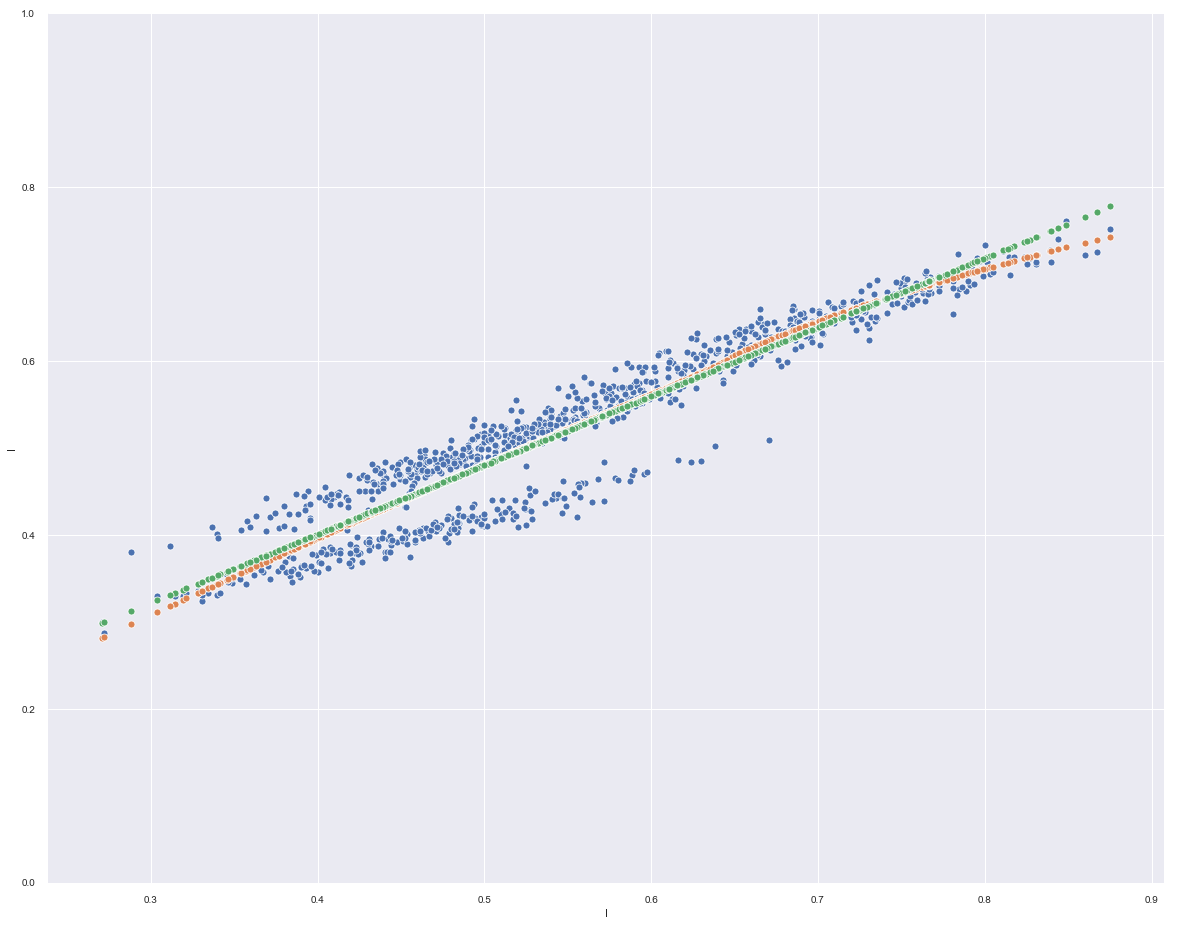

In [23]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="I", y="IPref", data=useData, ax=axarr)
plot1.set(ylim=(0,1))
plot2 = sns.scatterplot(x=useData["I"], y=sigPref, ax=axarr)
plot3 = sns.scatterplot(x=useData["I"], y=linPref, ax=axarr)

1
[0.84754883 0.56577119 0.66134065 0.24884373]
count    3.000000e+02
mean     1.232206e-03
std      1.347631e-03
min      2.071655e-09
25%      1.711488e-04
50%      7.248360e-04
75%      1.992918e-03
max      6.578722e-03
dtype: float64
[0.67487273 0.11053864]
count    3.000000e+02
mean     1.227738e-03
std      1.315588e-03
min      2.297022e-08
25%      1.814516e-04
50%      7.684601e-04
75%      1.884956e-03
max      6.316609e-03
dtype: float64
2
[0.90105252 0.58743887 0.68786274 0.30848931]
count    3.000000e+02
mean     1.303227e-04
std      2.193553e-04
min      4.245124e-12
25%      1.317324e-05
50%      5.146506e-05
75%      1.570287e-04
max      1.558173e-03
dtype: float64
[0.62617627 0.18735097]
count    3.000000e+02
mean     1.292517e-04
std      2.173160e-04
min      2.396753e-11
25%      1.198835e-05
50%      5.012666e-05
75%      1.556244e-04
max      1.517122e-03
dtype: float64
3
[0.9444016  0.79190245 0.9326687  0.25040337]
count    3.000000e+02
mean     1.507982e-04


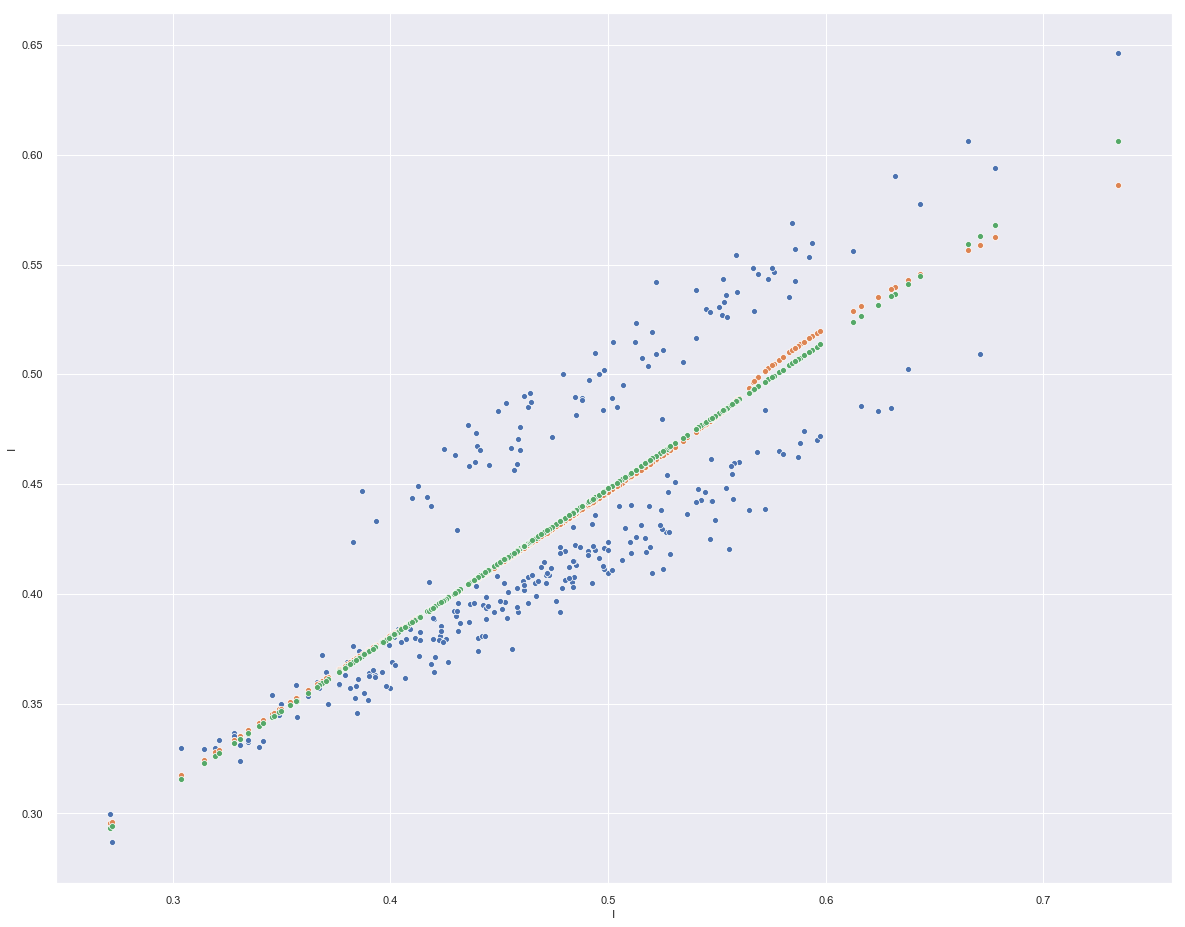

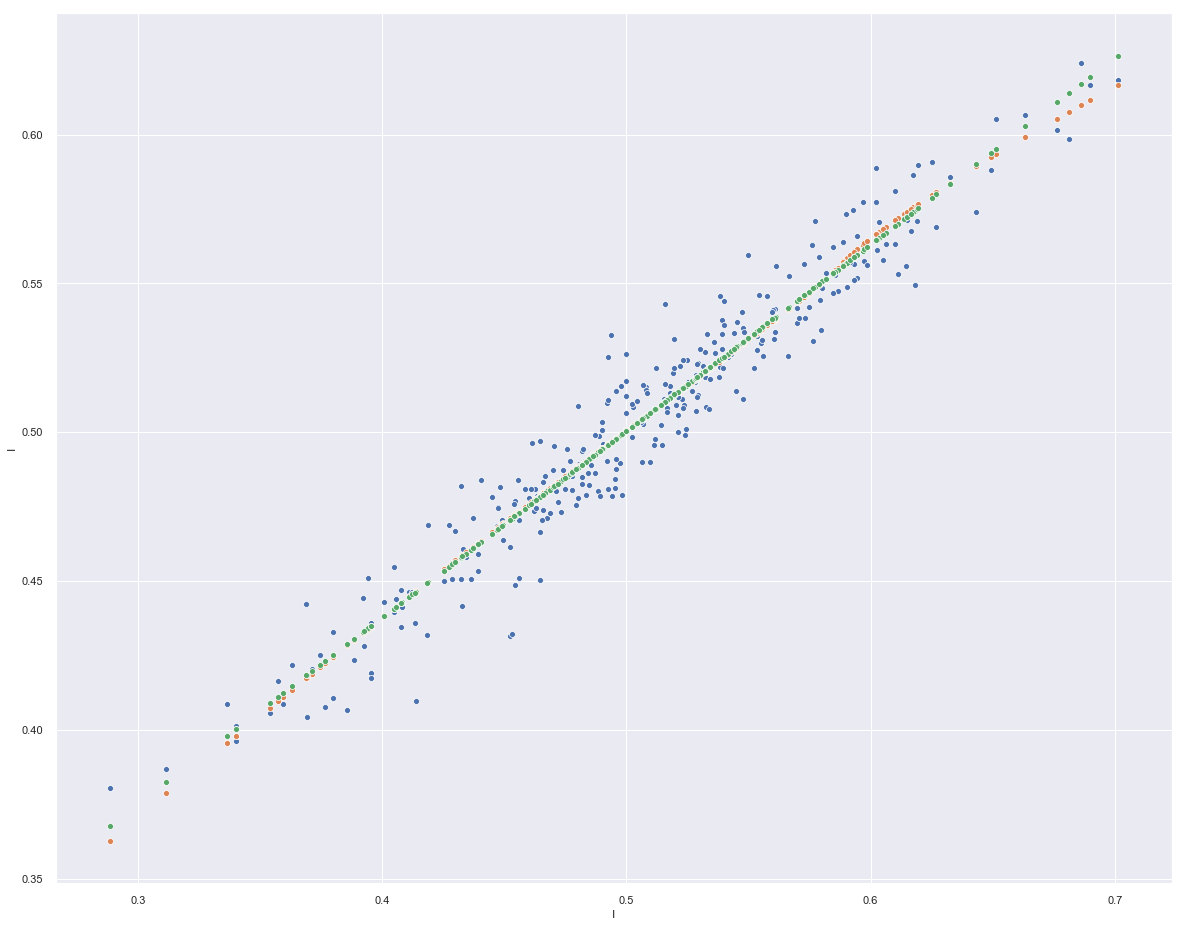

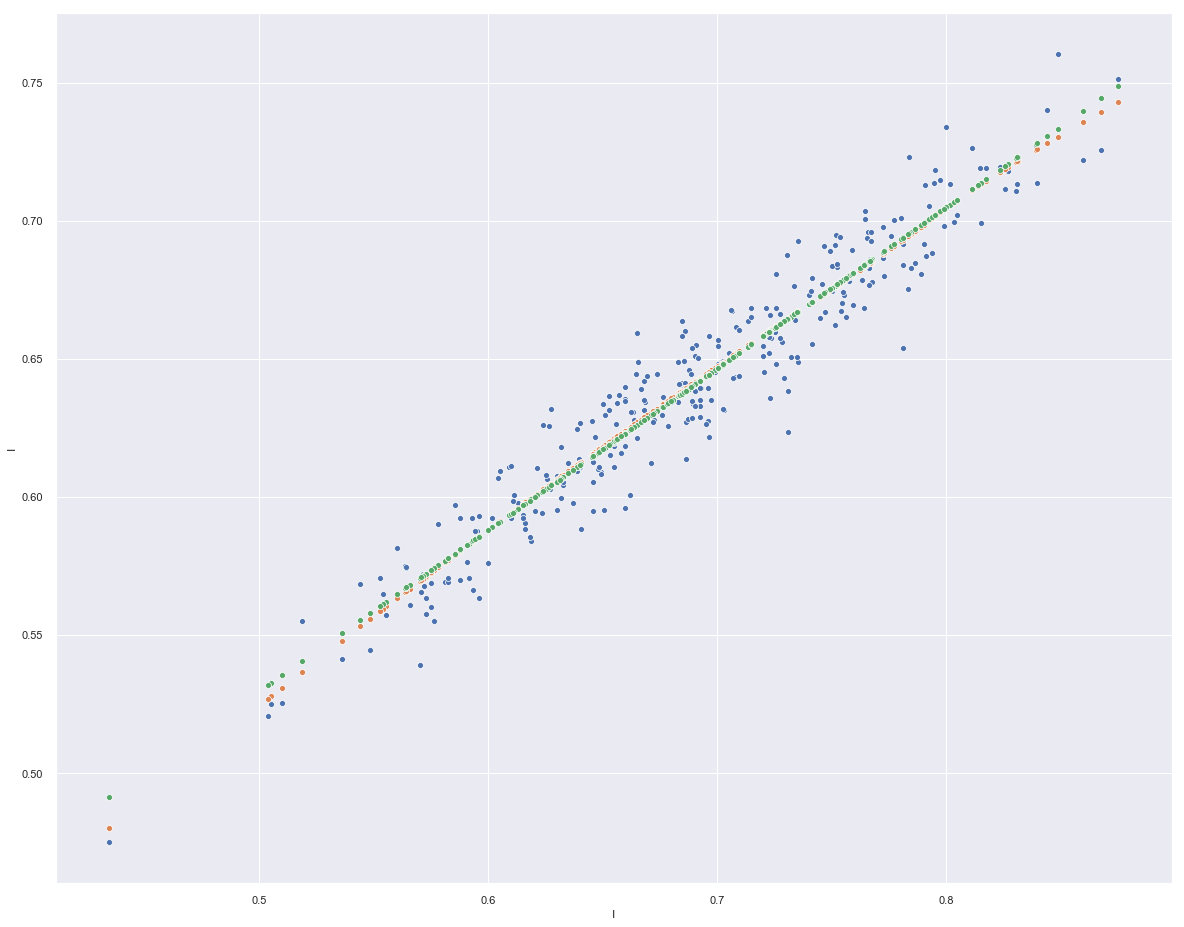

In [42]:
for pop, popData in finalPops:
    print(pop)
    useData = popData[(popData["I"]!=0) & (popData["I"] != 1)]
    if len(useData != 0):
        popt, pcov = curve_fit(sigmoCurve, xdata=useData["I"], ydata=useData["IPref"], p0=[0.5, 0.5, useData["IPref"].median(), 0.1], bounds=([0,0,0,0], [1,2,1,1]))
        print(popt)
        sigPref = useData["I"].apply(sigmoCurve, args=tuple(popt))
        sigPref.describe()
        sigVar = (useData["IPref"]-sigPref)**2
        print(sigVar.describe())
        popt,pcov = curve_fit(linEq, xdata=useData["I"], ydata=useData["IPref"], bounds=([0,0],[1,1]))
        print(popt)
        linPref = useData["I"].apply(linEq, args=tuple(popt))
        linVar = (useData["IPref"]-linPref)**2
        print(linVar.describe())
        fig, axarr = plt.subplots(1,1, figsize=(20,16))
        plot1=sns.scatterplot(x="I", y="IPref", data=useData, ax=axarr)
        #plot1.set(ylim=(0,1))
        plot2 = sns.scatterplot(x=useData["I"], y=sigPref, ax=axarr)
        plot3 = sns.scatterplot(x=useData["I"], y=linPref, ax=axarr)


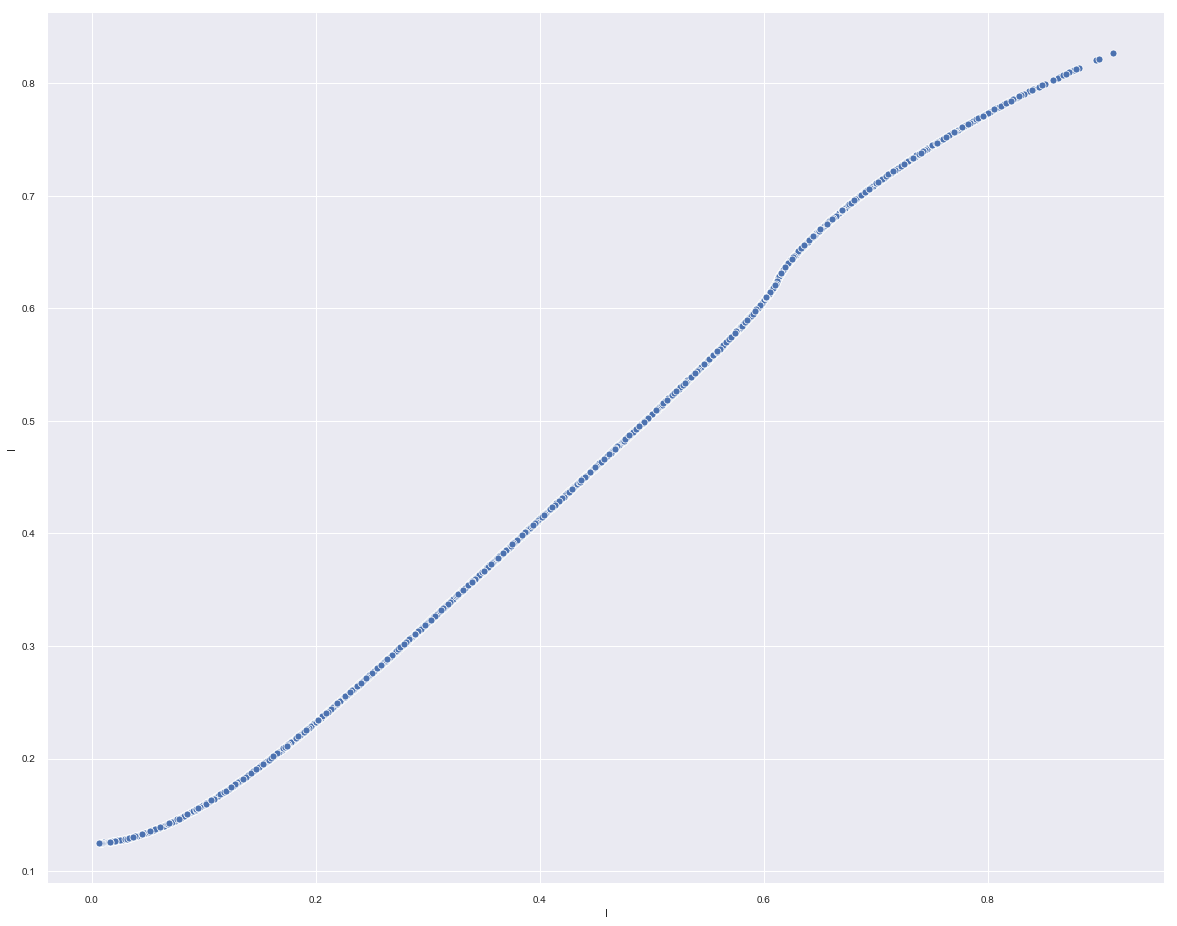

In [19]:
regFec = useData["I"].apply(sigmoCurve, args=(popt[0], popt[1],1,popt[3]))
fig, ax = plt.subplots(figsize=(20,16))
plot1 = sns.scatterplot(x=useData["I"], y=regFec, ax=ax)

In [24]:
useData = data[(data["O"]!=0) & (data["O"]!=1)]


popt, pcov = curve_fit(sigmoCurve, xdata=useData["O"], ydata=useData["OPref"], p0=[0.5, 1, useData["OPref"].median(),1], bounds=([0,0,0,0], [1,2,np.inf,1]))
print(popt)
sigPref = useData["O"].apply(sigmoCurve, args=tuple(popt))
sigPref.describe()
sigVar = (useData["OPref"]-sigPref)**2
print(sigVar.describe())
popt,pcov = curve_fit(linEq, xdata=useData["O"], ydata=useData["OPref"], bounds=([0,0],[1,1]))
print(popt)
linPref = useData["O"].apply(linEq, args=tuple(popt))
linVar = (useData["OPref"]-linPref)**2
print(linVar.describe())

[0.78579215 0.63837913 0.78683779 0.25317414]
count    9.000000e+02
mean     1.151309e-03
std      1.722611e-03
min      3.617729e-09
25%      1.162419e-04
50%      5.234448e-04
75%      1.476306e-03
max      1.565640e-02
dtype: float64
[0.7703299 0.0953149]
count    9.000000e+02
mean     1.199423e-03
std      1.790574e-03
min      5.385345e-09
25%      1.268977e-04
50%      5.273837e-04
75%      1.369533e-03
max      1.268095e-02
dtype: float64


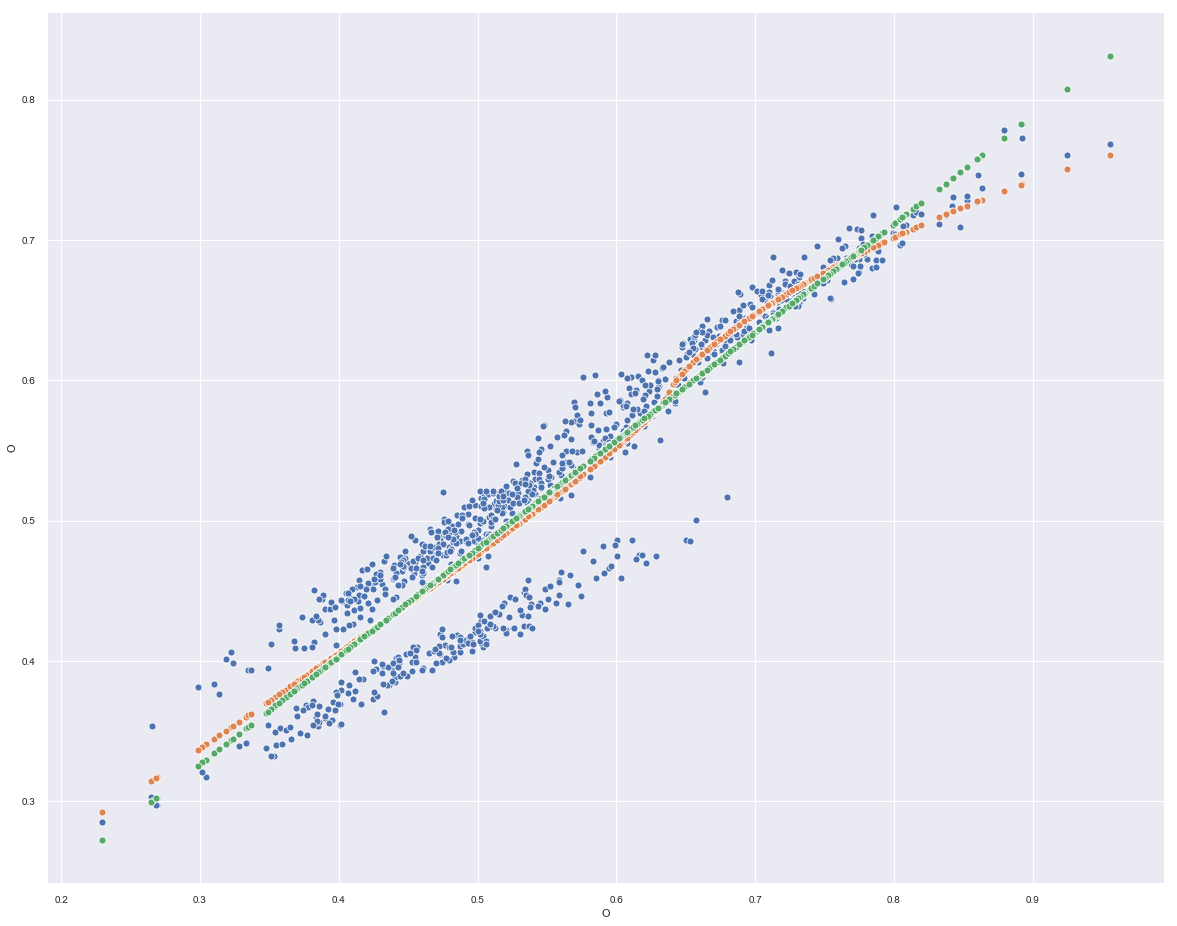

In [25]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="O", y="OPref", data=useData, ax=axarr)
plot2 = sns.scatterplot(x=useData["O"], y=sigPref, ax=axarr)
plot3 = sns.scatterplot(x=useData["O"], y=linPref, ax=axarr)

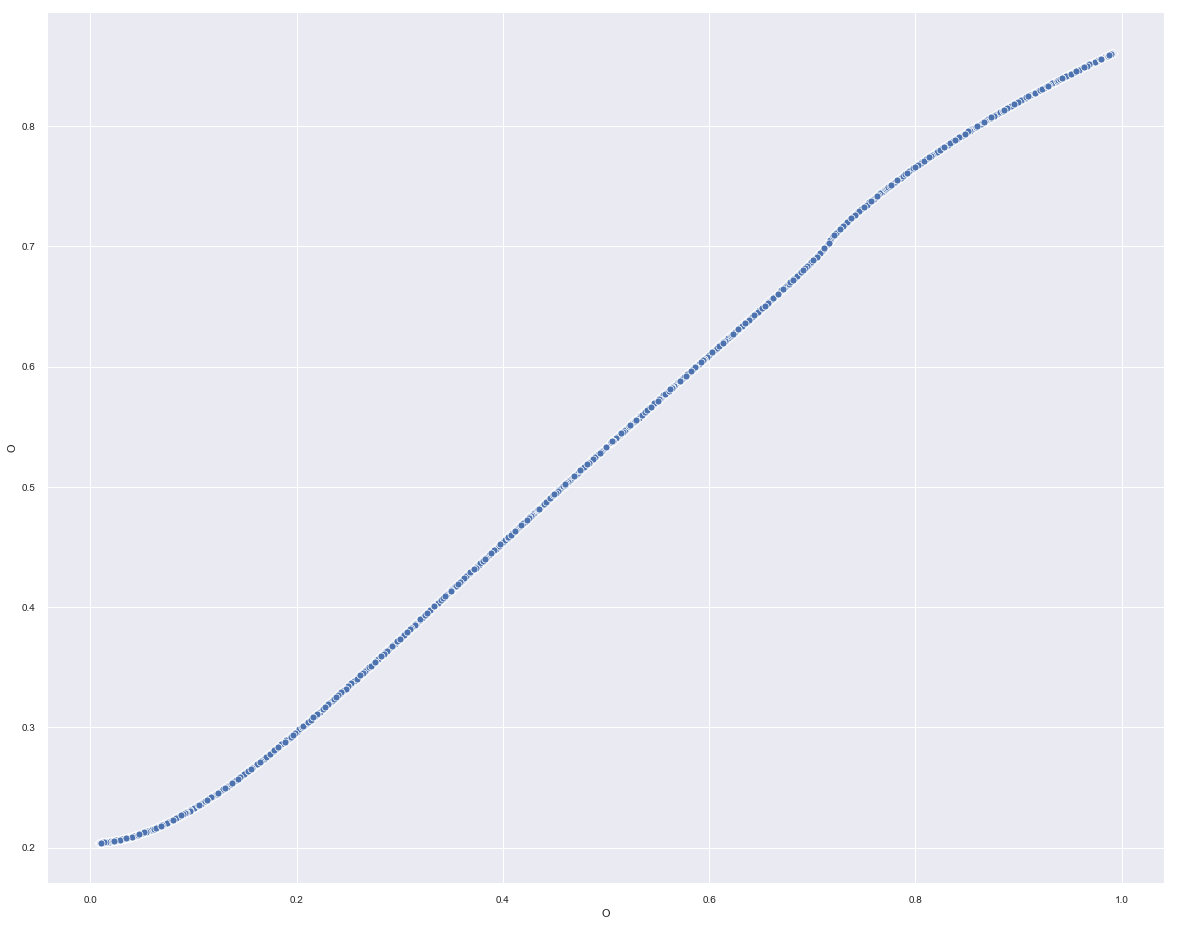

In [27]:
regFec = useData["O"].apply(sigmoCurve, args=(popt[0], popt[1],1, popt[3]))
fig, ax = plt.subplots(figsize=(20,16))
plot1 = sns.scatterplot(x=useData["O"], y=regFec, ax=ax)

In [28]:
def sigmoSym(x, Lambda, mult, intercept):
    f= 2*np.abs(x)-1
    f=(np.sign(f)*(np.abs(f)**Lambda)+1)/2
    f=(np.sin(np.pi*f/2)**2+intercept)*mult
    return f

useData = data[(data["A"]!=0) & (data["A"] != 1)]
popt, pcov = curve_fit(sigmoCurve, xdata=useData["A"], ydata=useData["APrefadj"], p0=[0.5, 0.5, useData["APrefadj"].median(), 0.1], bounds=([0,0,0,0], [1,2,1,1]))
print(popt)
sigPref = useData["A"].apply(sigmoCurve, args=tuple(popt))
sigPref.describe()
sigVar = (useData["APrefadj"]-sigPref)**2
print(sigVar.describe())
popt,pcov = curve_fit(linEq, xdata=useData["A"], ydata=useData["APrefadj"], bounds=([0,0],[1,1]))
print(popt)
linPref = useData["A"].apply(linEq, args=tuple(popt))
linVar = (useData["APrefadj"]-linPref)**2
print(linVar.describe())


[0.92169213 0.42327548 0.42184591 0.41524645]
count    8.160000e+02
mean     1.077282e-04
std      1.612428e-04
min      3.781522e-10
25%      1.104103e-05
50%      4.552354e-05
75%      1.383540e-04
max      1.500600e-03
dtype: float64
[0.53728837 0.15951959]
count    8.160000e+02
mean     1.094470e-04
std      1.582253e-04
min      1.447458e-09
25%      1.137284e-05
50%      4.836173e-05
75%      1.463232e-04
max      1.446347e-03
dtype: float64


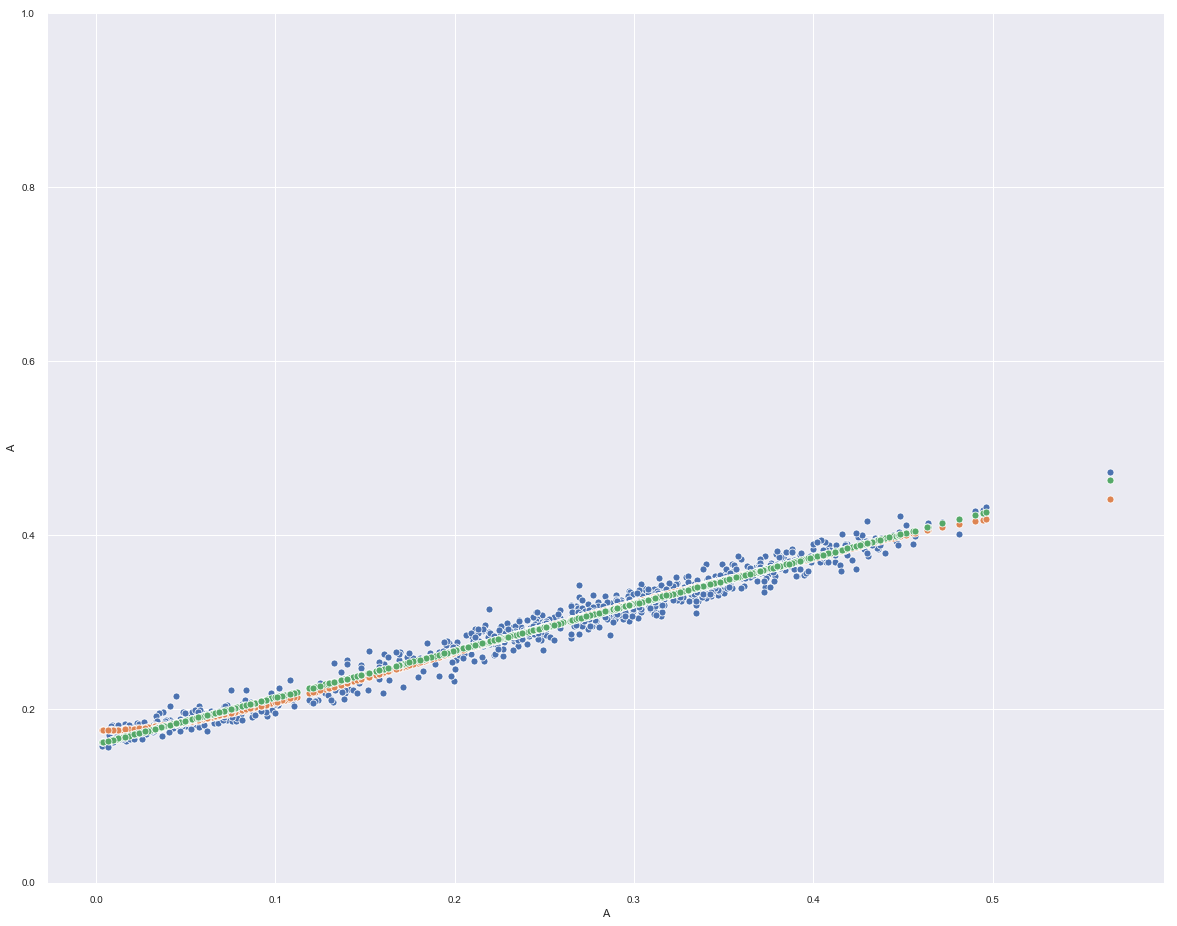

In [31]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="A", y="APrefadj", data=useData, ax=axarr)
plot1.set(ylim=(0,1))
plot2 = sns.scatterplot(x=useData["A"], y=sigPref, ax=axarr)
plot3 = sns.scatterplot(x=useData["A"], y=linPref, ax=axarr)

In [32]:
useData = data[(data["I"]!=0) & (data["I"] != 1)]
popt, pcov = curve_fit(sigmoCurve, xdata=useData["I"], ydata=useData["IPrefadj"], p0=[0.5, 0.5, useData["IPrefadj"].median(), 0.1], bounds=([0,0,0,0], [1,2,1,1]))
print(popt)
sigPref = useData["I"].apply(sigmoCurve, args=tuple(popt))
sigPref.describe()
sigVar = (useData["IPrefadj"]-sigPref)**2
print(sigVar.describe())
popt,pcov = curve_fit(linEq, xdata=useData["I"], ydata=useData["IPrefadj"], bounds=([0,0],[1,1]))
print(popt)
linPref = useData["I"].apply(linEq, args=tuple(popt))
linVar = (useData["IPrefadj"]-linPref)**2
print(linVar.describe())


[0.82428117 0.62468723 0.68462692 0.27371956]
count    9.000000e+02
mean     2.675441e-04
std      3.949146e-04
min      1.366748e-09
25%      2.457541e-05
50%      1.203507e-04
75%      3.293572e-04
max      3.334953e-03
dtype: float64
[0.63986827 0.12481983]
count    9.000000e+02
mean     2.807013e-04
std      3.985182e-04
min      4.497948e-09
25%      2.953925e-05
50%      1.308205e-04
75%      3.565365e-04
max      3.599817e-03
dtype: float64


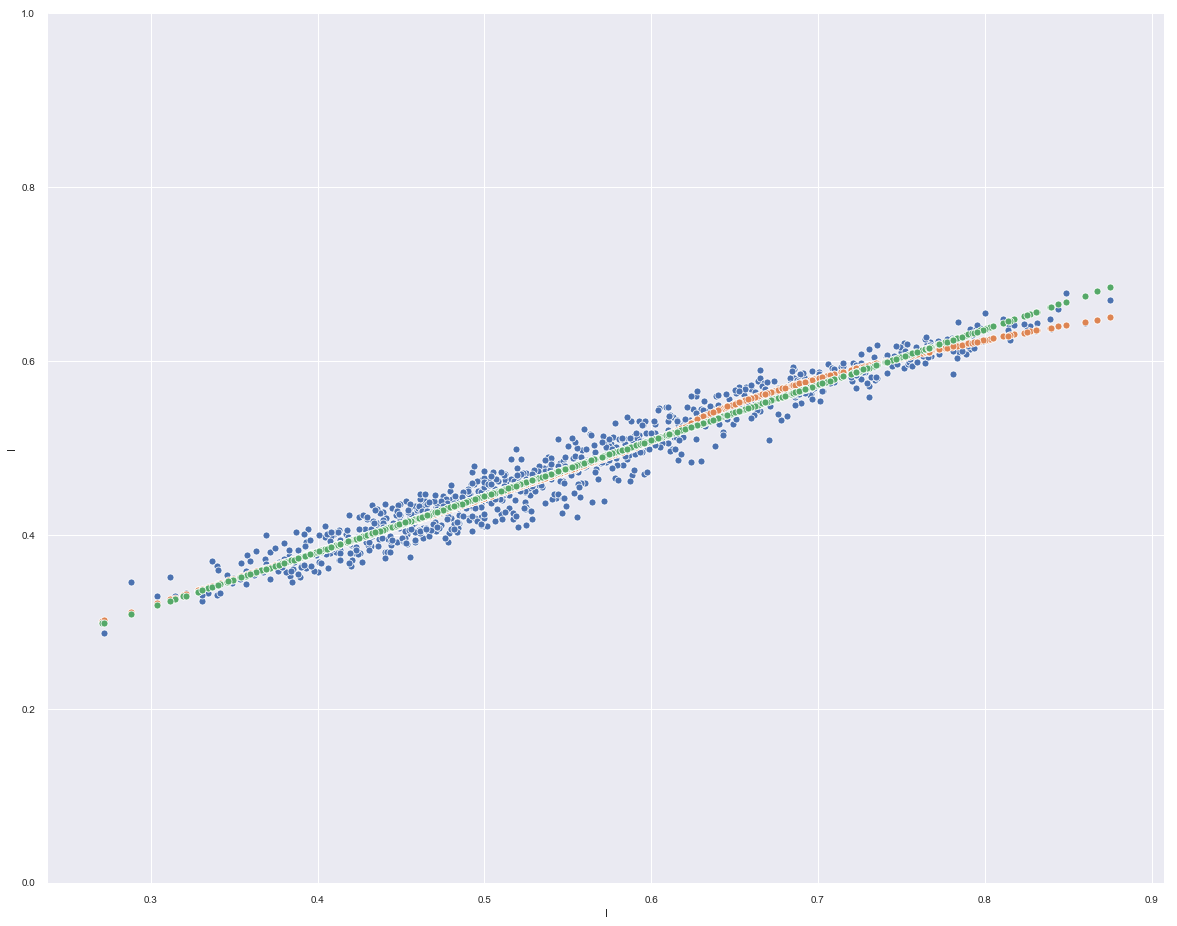

In [33]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="I", y="IPrefadj", data=useData, ax=axarr)
plot1.set(ylim=(0,1))
plot2 = sns.scatterplot(x=useData["I"], y=sigPref, ax=axarr)
plot3 = sns.scatterplot(x=useData["I"], y=linPref, ax=axarr)

In [38]:
def sigmoSym(x, Lambda, mult, intercept):
    f= 2*np.abs(x)-1
    f=(np.sign(f)*(np.abs(f)**Lambda)+1)/2
    f=(np.sin(np.pi*f/2)**2+intercept)*mult
    return f

useData = data[(data["O"]!=0) & (data["O"] != 1)]
popt, pcov = curve_fit(sigmoCurve, xdata=useData["O"], ydata=useData["OPrefadj"], p0=[0.5, 0.5, useData["OPrefadj"].median(), 0.1], bounds=([0,0,0,0], [1,2,1,1]))
print(popt)
sigPref = useData["O"].apply(sigmoCurve, args=tuple(popt))
sigPref.describe()
sigVar = (useData["OPrefadj"]-sigPref)**2
print(sigVar.describe())
popt,pcov = curve_fit(linEq, xdata=useData["O"], ydata=useData["OPrefadj"], bounds=([0,0],[1,1]))
print(popt)
linPref = useData["O"].apply(linEq, args=tuple(popt))
linVar = (useData["OPrefadj"]-linPref)**2
print(linVar.describe())


[0.80745785 0.64644932 0.67347066 0.30344591]
count    9.000000e+02
mean     2.650623e-04
std      4.105588e-04
min      2.093289e-09
25%      2.553352e-05
50%      1.117580e-04
75%      3.300537e-04
max      3.934650e-03
dtype: float64
[0.63021223 0.1294518 ]
count    9.000000e+02
mean     2.843530e-04
std      4.158488e-04
min      8.789124e-10
25%      2.229375e-05
50%      1.258723e-04
75%      3.727158e-04
max      3.055168e-03
dtype: float64


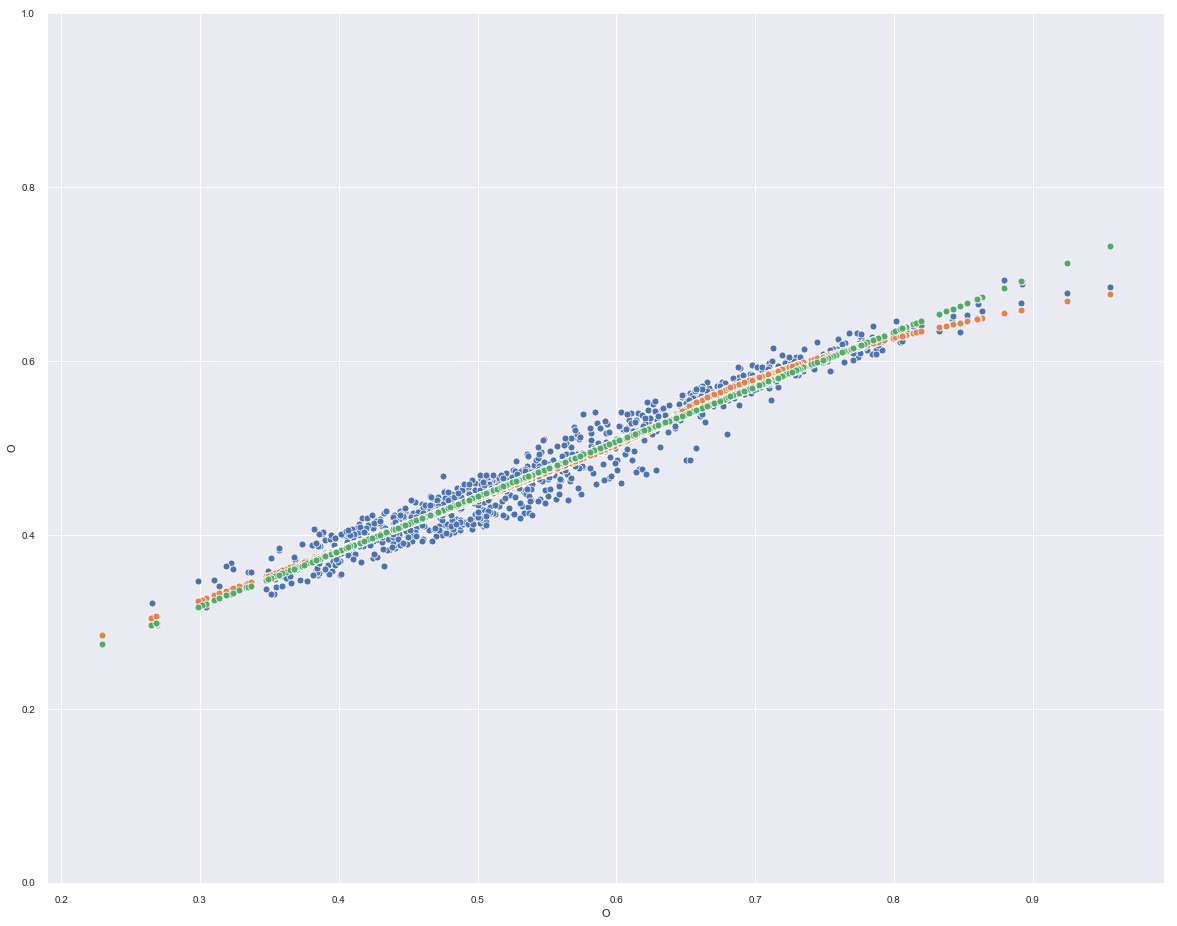

In [39]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="O", y="OPrefadj", data=useData, ax=axarr)
plot1.set(ylim=(0,1))
plot2 = sns.scatterplot(x=useData["O"], y=sigPref, ax=axarr)
plot3 = sns.scatterplot(x=useData["O"], y=linPref, ax=axarr)

In [40]:
def sigmoSym(x, Lambda, mult, intercept):
    f= 2*np.abs(x)-1
    f=(np.sign(f)*(np.abs(f)**Lambda)+1)/2
    f=(1-(np.sin(np.pi*f/2)**2+intercept))*mult
    return f

useData = data[(data["A"]!=0) & (data["A"]!=1)]

popt, pcov = curve_fit(sigmoCurve, xdata=useData["APref"], ydata=useData["AFec"], p0=[0.5, 1, useData["AFec"].median(),1], bounds=([0,0,0,0], [1,2,np.inf,1]))
print(popt)
sigFec = useData["APref"].apply(sigmoCurve, args=tuple(popt))
sigFec.describe()
sigVar = (useData["AFec"]-sigFec)**2
print(sigVar.describe())
popt,pcov = curve_fit(linEq, xdata=useData["APref"], ydata=useData["AFec"], bounds=([-500,0],[500,500]))
print(popt)
linFec = useData["APref"].apply(linEq, args=tuple(popt))
linVar = (useData["AFec"]-linFec)**2
print(linVar.describe())

[1.00000000e+00 9.13394060e-01 2.32466083e+02 6.52008174e-12]
count     816.000000
mean      196.679936
std       330.289701
min         0.004328
25%        20.975035
50%        88.966340
75%       237.418859
max      4348.055570
dtype: float64
[-154.15969666  245.11240694]
count     816.000000
mean      196.103199
std       329.385453
min         0.000635
25%        21.352032
50%        89.132358
75%       238.406665
max      4301.252335
dtype: float64


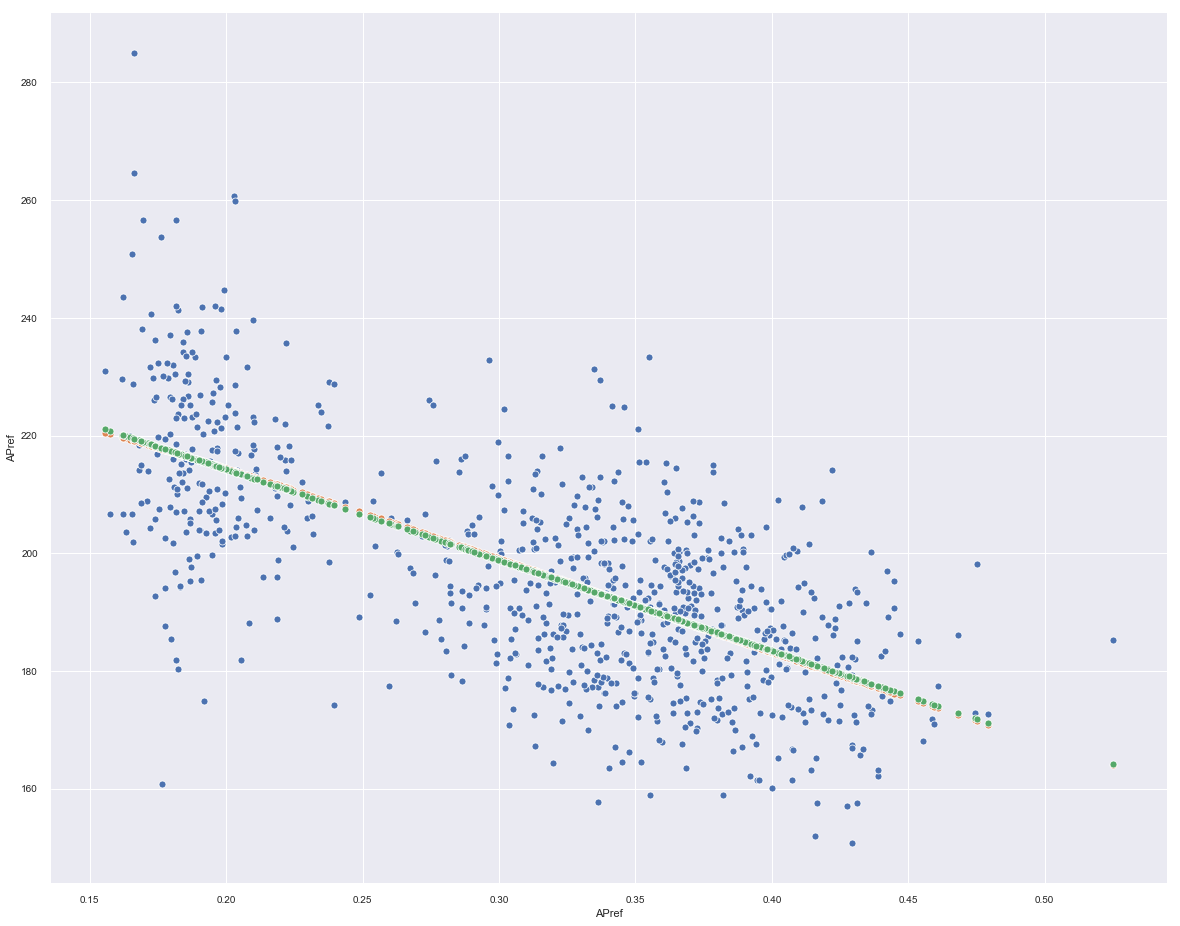

In [37]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="APref", y="AFec", data=useData, ax=axarr)
plot2 = sns.scatterplot(x=useData["APref"], y=sigFec, ax=axarr)
plot3 = sns.scatterplot(x=useData["APref"], y=linFec, ax=axarr)

In [41]:
useData = data[(data["I"]!=0) & (data["I"]!=1)]

popt, pcov = curve_fit(sigmoCurve, xdata=useData["IPref"], ydata=useData["IFec"], p0=[0.5, 1, useData["IFec"].median(),1], bounds=([0,0,0,0], [1,2,np.inf,1]))
print(popt)
sigFec = useData["IPref"].apply(sigmoCurve, args=tuple(popt))
sigFec.describe()
sigVar = (useData["IFec"]-sigFec)**2
print(sigVar.describe())
popt,pcov = curve_fit(linEq, xdata=useData["IPref"], ydata=useData["IFec"], bounds=([-500,0],[500,500]))
print(popt)
linFec = useData["IPref"].apply(linEq, args=tuple(popt))
linVar = (useData["IFec"]-linFec)**2
print(linVar.describe())

[1.00000000e+00 1.37712550e+00 2.40517266e+02 2.82654015e-10]
count     900.000000
mean      239.693217
std       340.818014
min         0.000738
25%        23.872508
50%       108.605490
75%       310.469868
max      2700.556467
dtype: float64
[-105.92922423  253.71106699]
count    9.000000e+02
mean     2.395102e+02
std      3.401094e+02
min      3.613115e-08
25%      2.338743e+01
50%      1.089407e+02
75%      3.048460e+02
max      2.662988e+03
dtype: float64


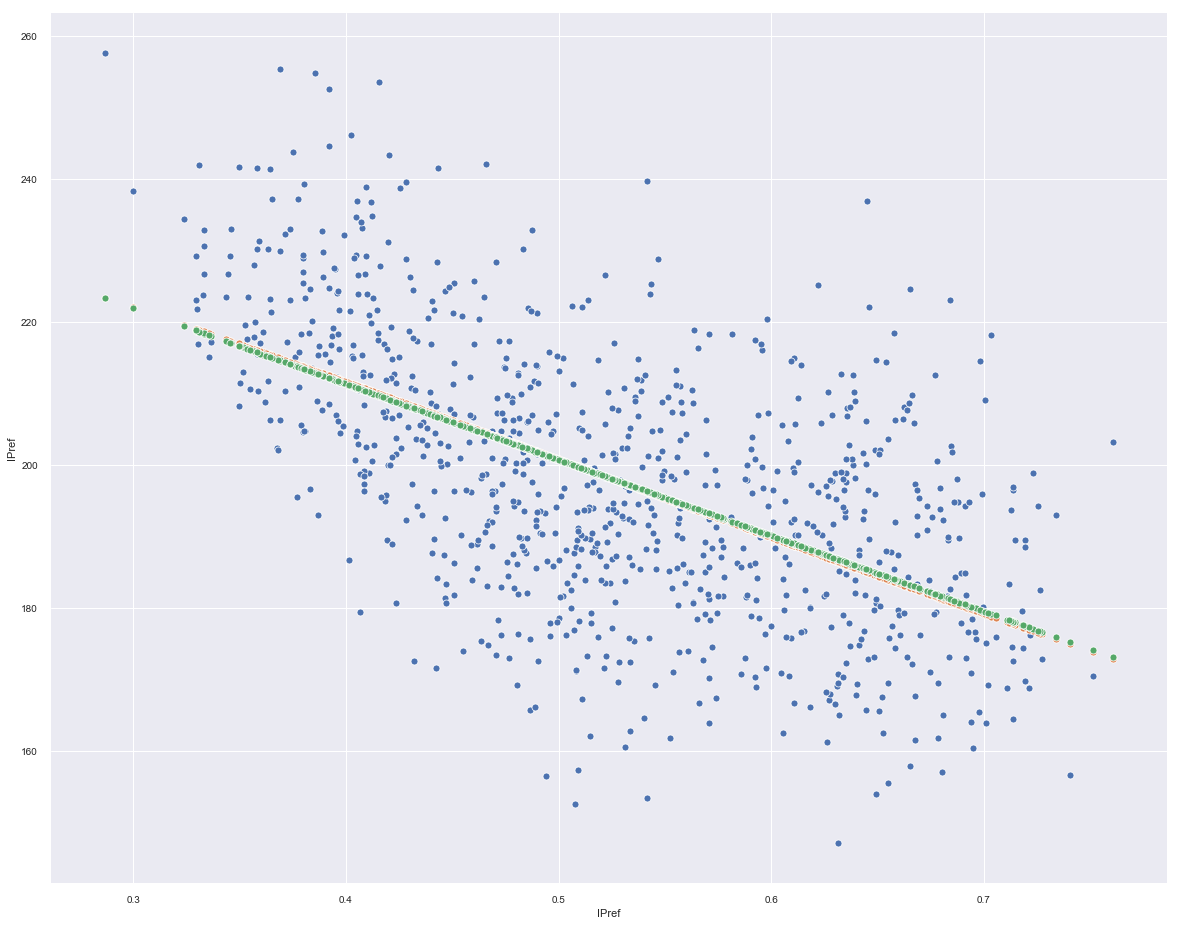

In [42]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="IPref", y="IFec", data=useData, ax=axarr)
plot2 = sns.scatterplot(x=useData["IPref"], y=sigFec, ax=axarr)
plot3 = sns.scatterplot(x=useData["IPref"], y=linFec, ax=axarr)

In [43]:
useData = data[(data["O"]!=0) & (data["O"]!=1)]

popt, pcov = curve_fit(sigmoCurve, xdata=useData["OPref"], ydata=useData["OFec"], p0=[0.5, 1, useData["OFec"].median(),1], bounds=([0,0,0,0], [1,2,np.inf,1]))
print(popt)
sigFec = useData["OPref"].apply(sigmoCurve, args=tuple(popt))
sigFec.describe()
sigVar = (useData["OFec"]-sigFec)**2
print(sigVar.describe())
popt,pcov = curve_fit(linEq, xdata=useData["OPref"], ydata=useData["OFec"], bounds=([-500,0],[500,500]))
print(popt)
linFec = useData["OPref"].apply(linEq, args=tuple(popt))
linVar = (useData["OFec"]-linFec)**2
print(linVar.describe())

[1.00000000e+00 1.32146129e+00 2.43128778e+02 1.38381686e-09]
count     900.000000
mean      233.088241
std       347.209730
min         0.002796
25%        21.367743
50%        91.986781
75%       300.480389
max      2405.871790
dtype: float64
[-111.58126389  256.42721537]
count     900.000000
mean      233.367718
std       347.503986
min         0.006644
25%        22.451017
50%        91.463477
75%       300.062136
max      2371.063461
dtype: float64


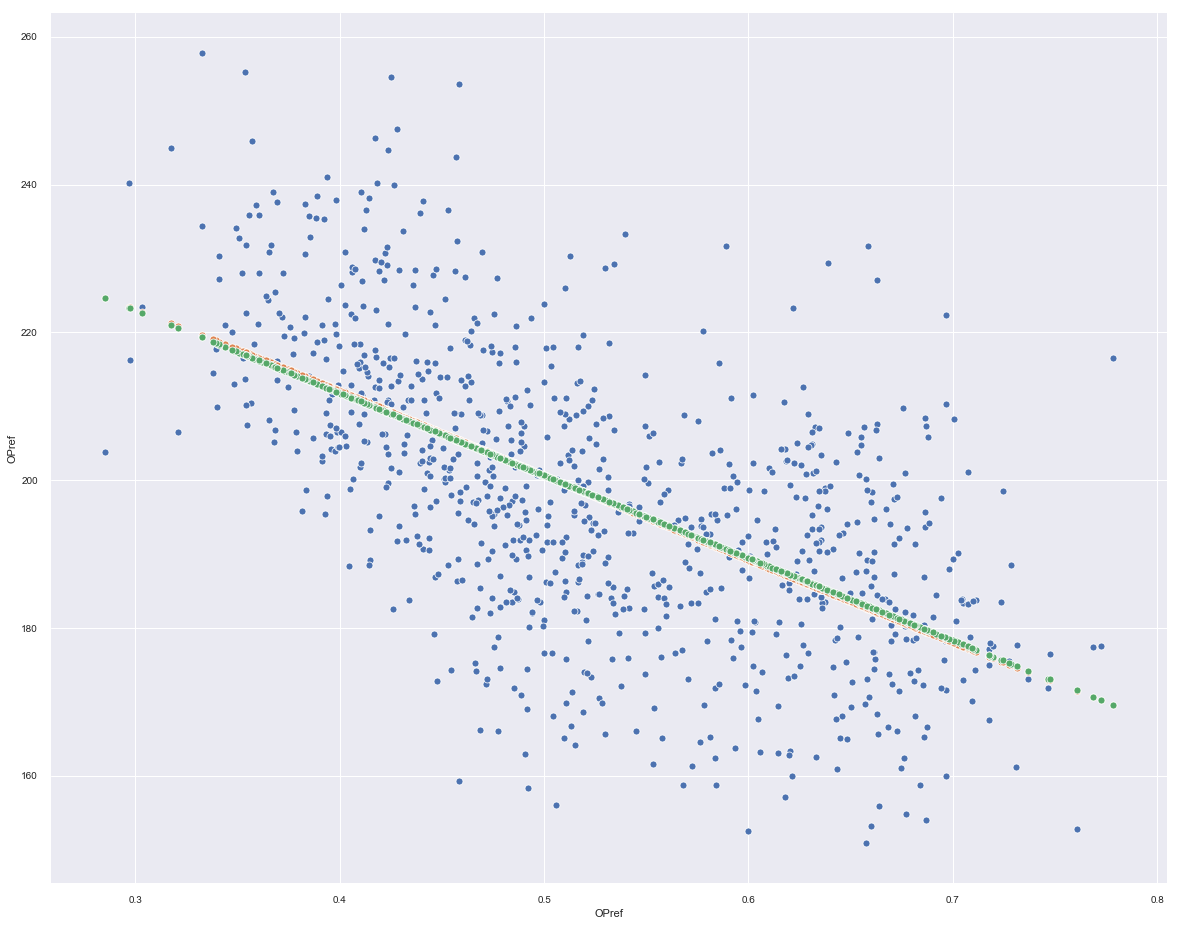

In [44]:
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1=sns.scatterplot(x="OPref", y="OFec", data=useData, ax=axarr)
plot2 = sns.scatterplot(x=useData["OPref"], y=sigFec, ax=axarr)
plot3 = sns.scatterplot(x=useData["OPref"], y=linFec, ax=axarr)

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


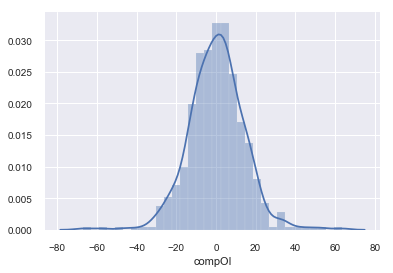

In [45]:
data["compOI"] = data["AFec"]-data["IFec"]
fig, ax=plt.subplots()
plot = sns.distplot(data[pd.notnull(data["compOI"])]["compOI"], ax=ax)

                            OLS Regression Results                            
Dep. Variable:                   AFec   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                 7.202e+04
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:25:35   Log-Likelihood:            -1.6081e+05
No. Observations:               38727   AIC:                         3.216e+05
Df Residuals:                   38725   BIC:                         3.216e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    212.9533      0.134   1588.792      0.0

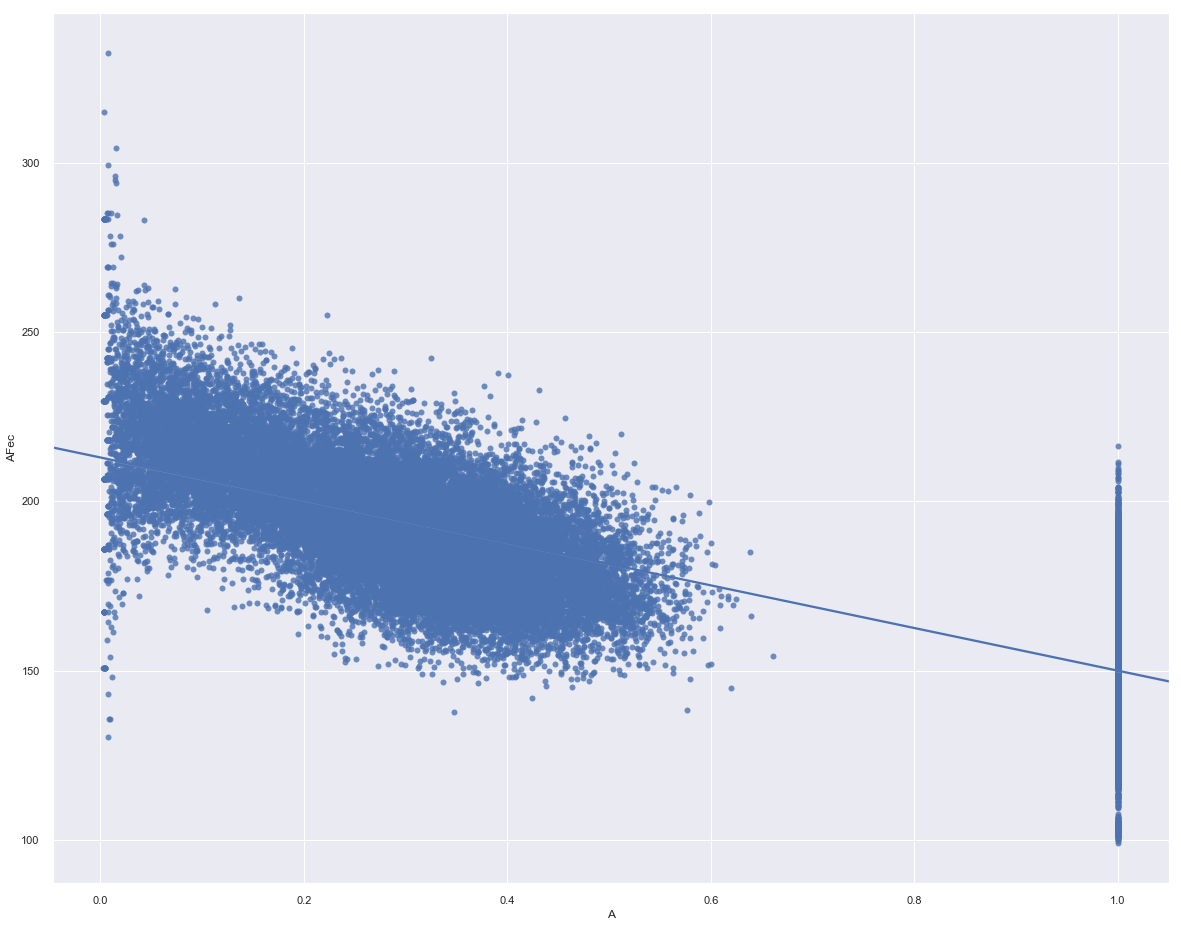

In [51]:
useData=data[data["A"]!=0]
est = smf.ols(formula="AFec~A", data=useData).fit()
print(est.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="A", y="AFec", data=useData, ax=axarr)

                            OLS Regression Results                            
Dep. Variable:                   AFec   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                 3.021e+04
Date:                Thu, 31 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:05:35   Log-Likelihood:            -1.1941e+05
No. Observations:               29874   AIC:                         2.388e+05
Df Residuals:                   29872   BIC:                         2.388e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    322.1378      0.246   1310.193      0.0

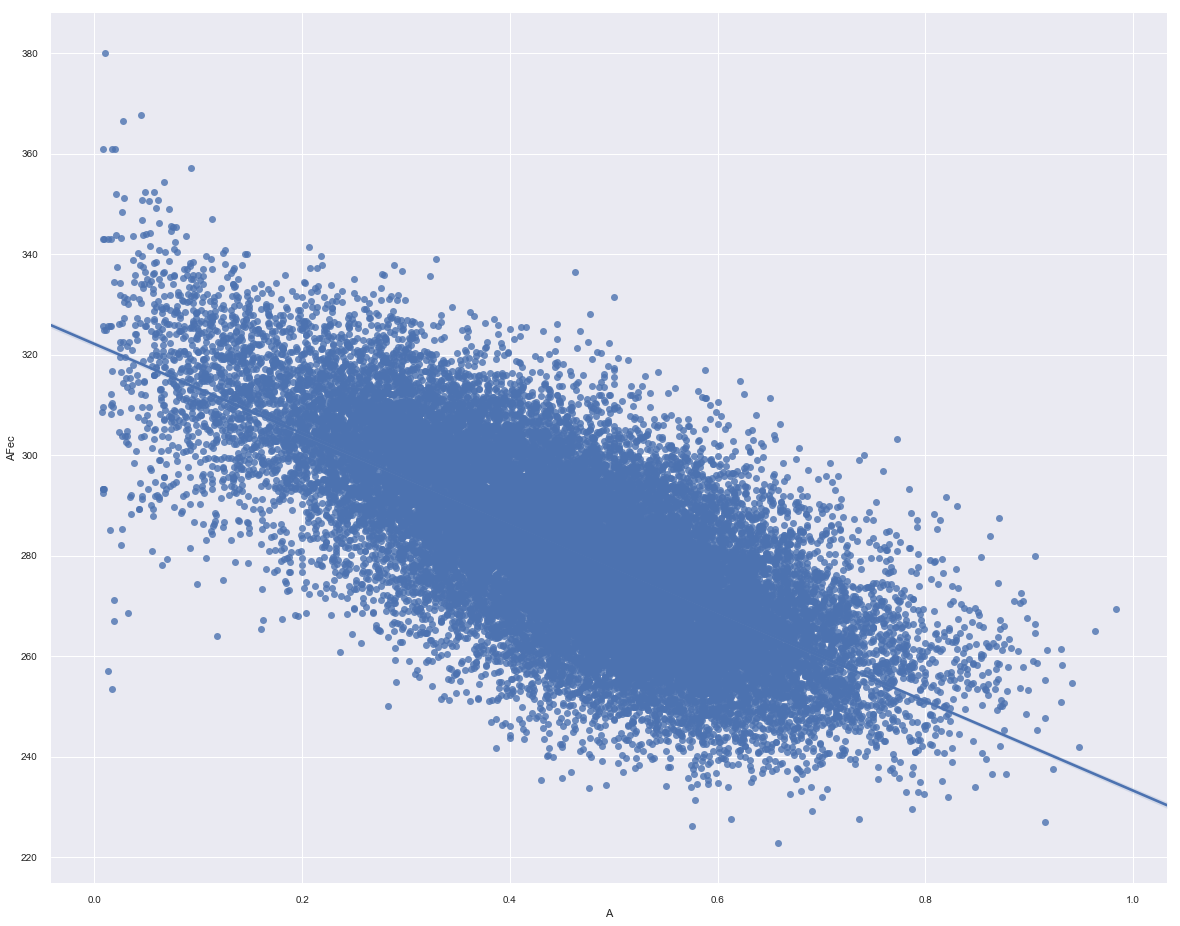

In [23]:
est = smf.ols(formula="AFec~A", data=data[(data["A"]!=0) & (data["A"]!=1) & (data["AFec"]!=0)]).fit()
print(est.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="A", y="AFec", data=data[(data["A"]!=0) & (data["A"]!=1) & (data["AFec"]!=0)], ax=axarr)

                            OLS Regression Results                            
Dep. Variable:                   IFec   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                 2.456e+04
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:42:37   Log-Likelihood:            -1.1942e+05
No. Observations:               30290   AIC:                         2.388e+05
Df Residuals:                   30288   BIC:                         2.389e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    276.9446      0.279    991.311      0.0

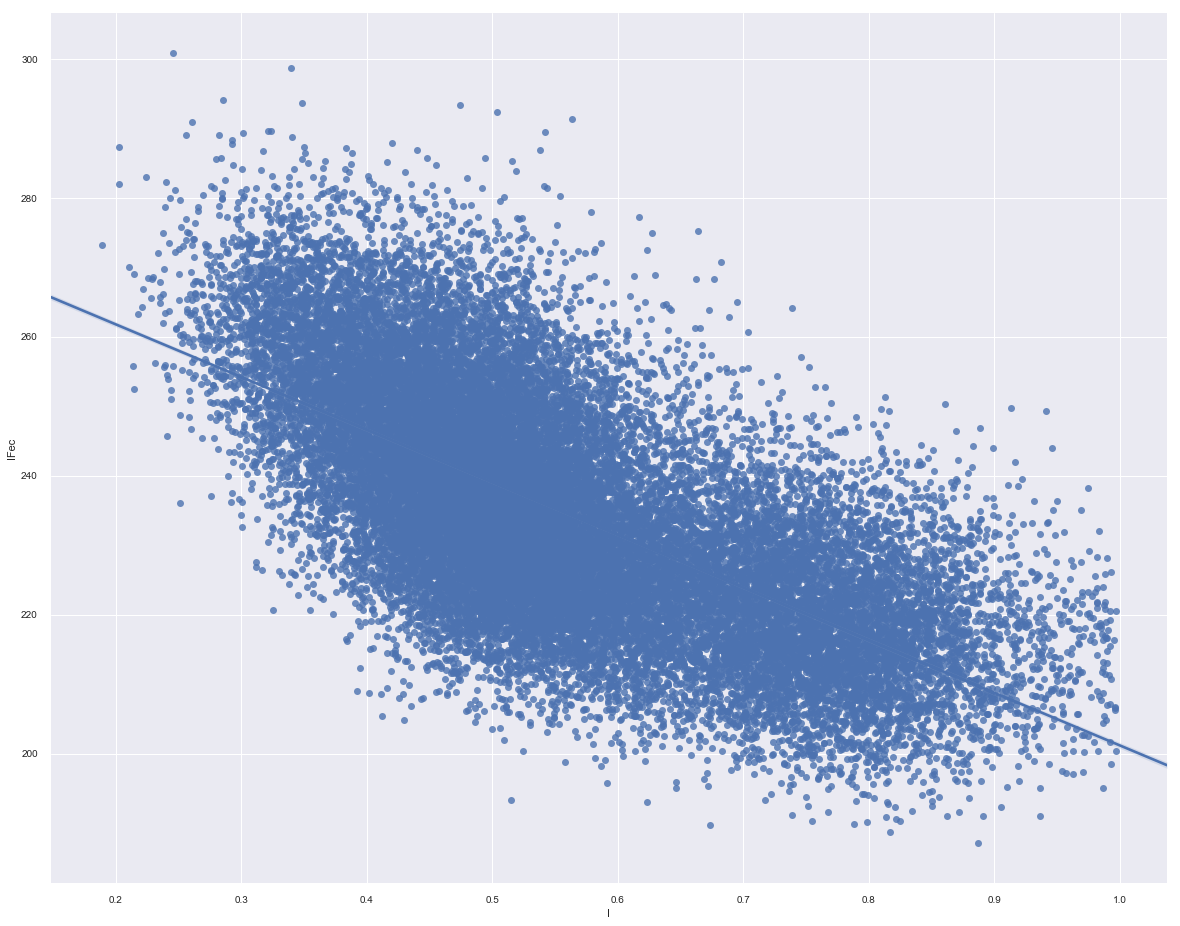

In [45]:
est = smf.ols(formula="IFec~I", data=data[(data["I"]!=0) & (data["I"]!=1) & (data["IFec"]!=0)]).fit()
print(est.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="I", y="IFec", data=data[(data["I"]!=0) & (data["I"]!=1) & (data["IFec"]!=0)], ax=axarr)

                            OLS Regression Results                            
Dep. Variable:                   OFec   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 2.526e+04
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:43:25   Log-Likelihood:            -1.1953e+05
No. Observations:               30300   AIC:                         2.391e+05
Df Residuals:                   30298   BIC:                         2.391e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    278.4641      0.286    973.716      0.0

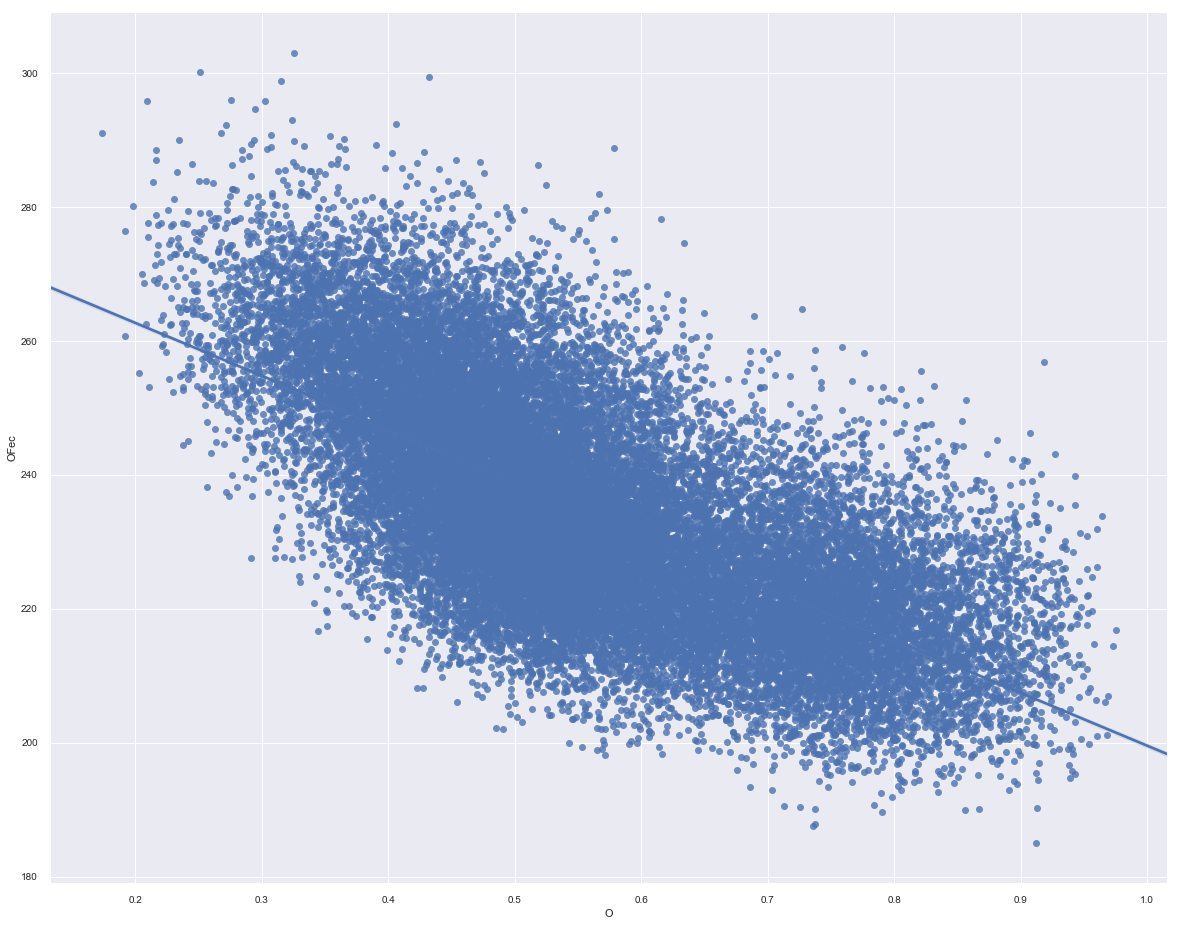

In [47]:
est = smf.ols(formula="OFec~O", data=data[(data["O"]!=0) & (data["O"]!=1) & (data["OFec"]!=0)]).fit()
print(est.summary())
fig, axarr = plt.subplots(1,1, figsize=(20,16))
plot1 = sns.regplot(x="O", y="OFec", data=data[(data["O"]!=0) & (data["O"]!=1) & (data["OFec"]!=0)], ax=axarr)

## Multiple Linear Regression


### Controls

In [54]:
est = smf.ols(formula="A~I+O", data=finals).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.635e+30
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:26:13   Log-Likelihood:                 22011.
No. Observations:                 693   AIC:                        -4.402e+04
Df Residuals:                     690   BIC:                        -4.400e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000   3.64e-16   2.75e+15      0.0

In [53]:
est = smf.ols(formula="I~A*O", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.563e+30
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:26:07   Log-Likelihood:                 22084.
No. Observations:                 693   AIC:                        -4.416e+04
Df Residuals:                     689   BIC:                        -4.414e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000   2.63e-16    3.8e+15      0.0

In [28]:
est = smf.ols(formula="O~I*A", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      O   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     26.96
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           6.05e-16
Time:                        09:56:44   Log-Likelihood:                 26.682
No. Observations:                 418   AIC:                            -45.36
Df Residuals:                     414   BIC:                            -29.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2176      0.020     10.730      0.0

In [56]:
est = smf.ols(formula="Total~A*I*O", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     296.5
Date:                Thu, 07 Nov 2019   Prob (F-statistic):          9.23e-187
Time:                        10:26:40   Log-Likelihood:                -3707.8
No. Observations:                 693   AIC:                             7430.
Df Residuals:                     686   BIC:                             7461.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.805e+13   6.05e+14     -0.096      0.9

### Preference per Morph

                            OLS Regression Results                            
Dep. Variable:                  APref   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 5.530e+05
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:46:10   Log-Likelihood:                 73828.
No. Observations:               27867   AIC:                        -1.477e+05
Df Residuals:                   27865   BIC:                        -1.476e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0880      0.000    405.428      0.0

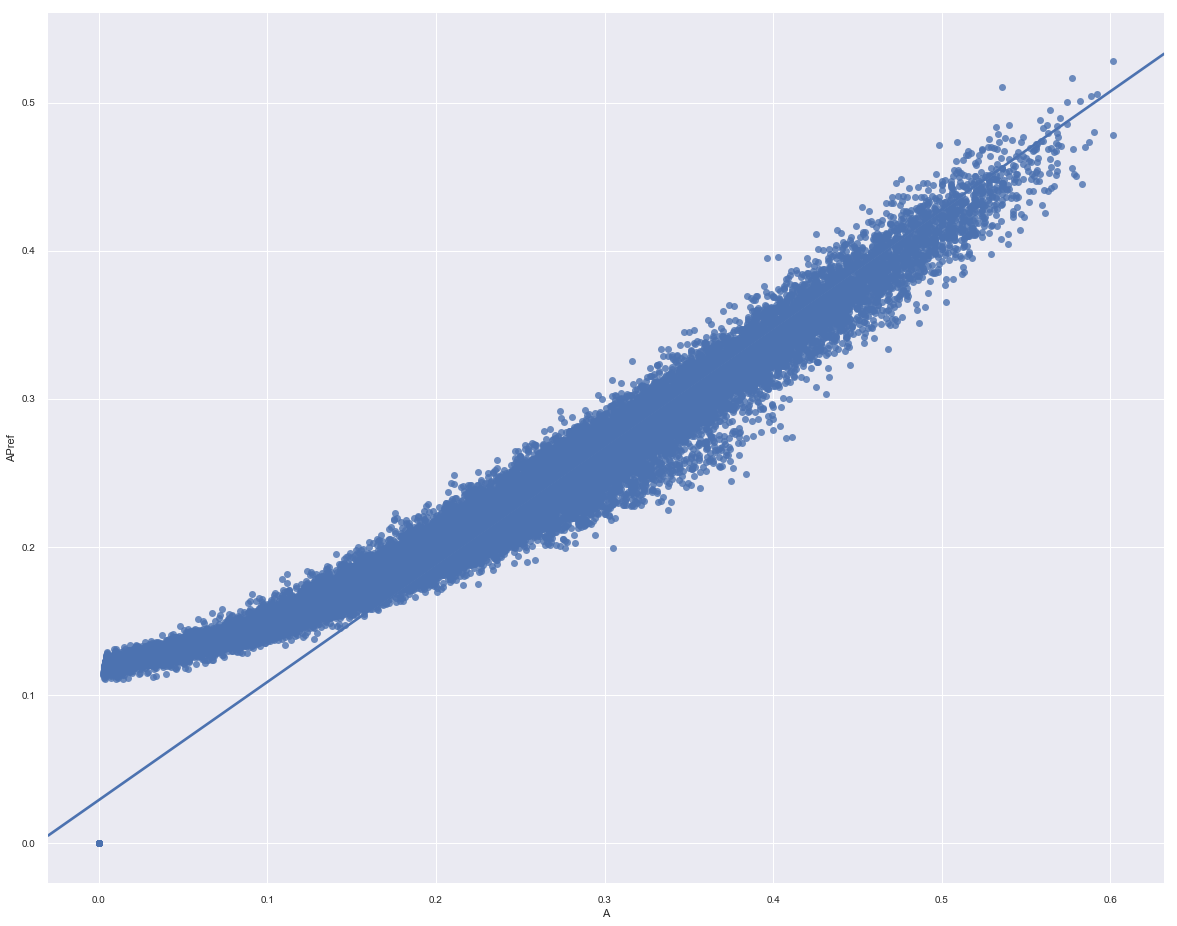

In [56]:
est = smf.ols(formula="APref~A", data=data[data["A"]!=0]).fit()
print(est.summary())
fig,ax=plt.subplots(figsize=(20,16))
plot = sns.regplot(x="A", y="APref", data=data, ax=ax)

In [35]:
est = smf.ols(formula="APref~A*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  APref   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     2624.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          7.34e-306
Time:                        15:15:18   Log-Likelihood:                 1359.0
No. Observations:                 505   AIC:                            -2710.
Df Residuals:                     501   BIC:                            -2693.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0865      0.012      7.334      

                            OLS Regression Results                            
Dep. Variable:                  IPref   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 2.175e+05
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:48:36   Log-Likelihood:                 58760.
No. Observations:               30300   AIC:                        -1.175e+05
Df Residuals:                   30297   BIC:                        -1.175e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1281      0.005     27.103      0.0

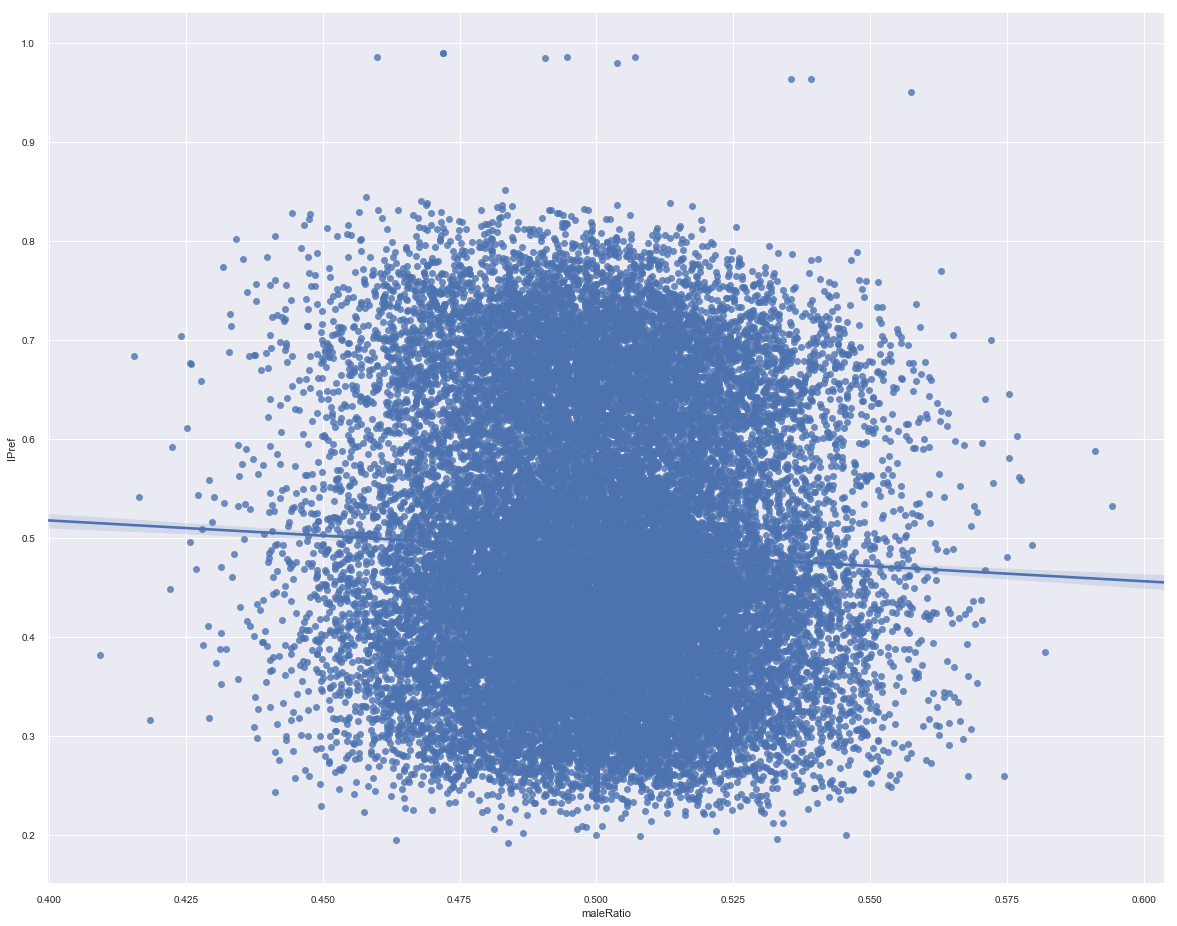

In [64]:
est = smf.ols(formula="IPref~I+maleRatio", data=data[data["I"]!=0]).fit()
print(est.summary())
fig,ax=plt.subplots(figsize=(20,16))
plot = sns.regplot(x="maleRatio", y="IPref", data=data[data["I"]!=0], ax=ax)

In [33]:
est = smf.ols(formula="IPref~I*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  IPref   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     166.2
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.41e-64
Time:                        09:56:44   Log-Likelihood:                 207.42
No. Observations:                 319   AIC:                            -406.8
Df Residuals:                     315   BIC:                            -391.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0374      0.165     -0.226      

In [34]:
est = smf.ols(formula="preOPref~O*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               preOPref   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -105.0
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               1.00
Time:                        09:56:44   Log-Likelihood:                 10722.
No. Observations:                 319   AIC:                        -2.144e+04
Df Residuals:                     315   BIC:                        -2.142e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3333   9.96e-16   3.35e+14      

In [35]:
est = smf.ols(formula="OPref~O*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  OPref   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     166.5
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.14e-64
Time:                        09:56:44   Log-Likelihood:                 207.57
No. Observations:                 319   AIC:                            -407.1
Df Residuals:                     315   BIC:                            -392.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0420      0.206     -0.204      

In [41]:
est = smf.ols(formula="AFec~A+Total", data=finals[finals["A"]!=0]).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   AFec   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     71.66
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           1.11e-23
Time:                        15:22:59   Log-Likelihood:                -776.37
No. Observations:                 185   AIC:                             1559.
Df Residuals:                     182   BIC:                             1568.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    322.7925      9.704     33.263      0.0

In [42]:
est = smf.ols(formula="FFec~(A:I)+Total", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   FFec   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     418.1
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          1.31e-107
Time:                        15:28:10   Log-Likelihood:                -2042.3
No. Observations:                 505   AIC:                             4091.
Df Residuals:                     502   BIC:                             4103.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    337.6329      5.015     67.325      0.0

In [38]:
est = smf.ols(formula="MalF~(A:I:O)+Total", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MalF   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                nan
Time:                        09:56:44   Log-Likelihood:                    inf
No. Observations:                 418   AIC:                              -inf
Df Residuals:                     415   BIC:                              -inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0          0        nan        n

# Plots

## Correlation

ValueError: cannot convert float NaN to integer

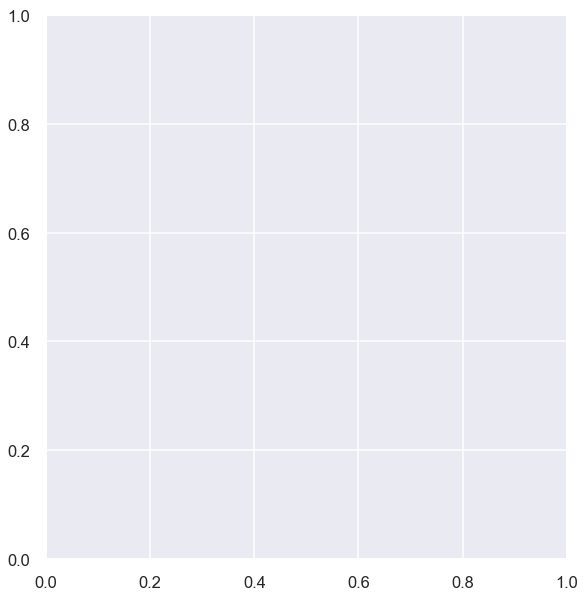

In [43]:
sns.set_context("talk")
sns.set_style("darkgrid")
corr = data.corr()
plt.figure(figsize=(10,10))
corrplot(data.corr())
plt.subplots_adjust(left=0.2, bottom=0.2)

## Correlation Per Population

ValueError: cannot convert float NaN to integer

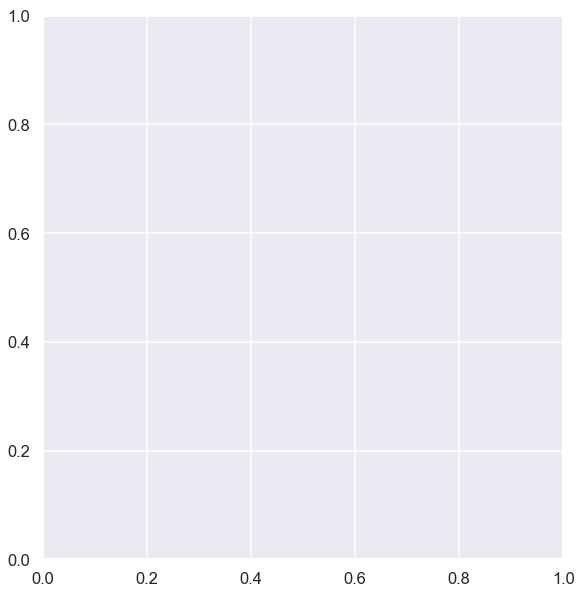

In [6]:
for pop, popData in pops:
    sns.set_style("darkgrid")
    plt.figure(figsize=(10,10))
    corrplot(popData.corr())
    plt.subplots_adjust(left=0.2, bottom=0.2)
    

## Preference vs. Frequency

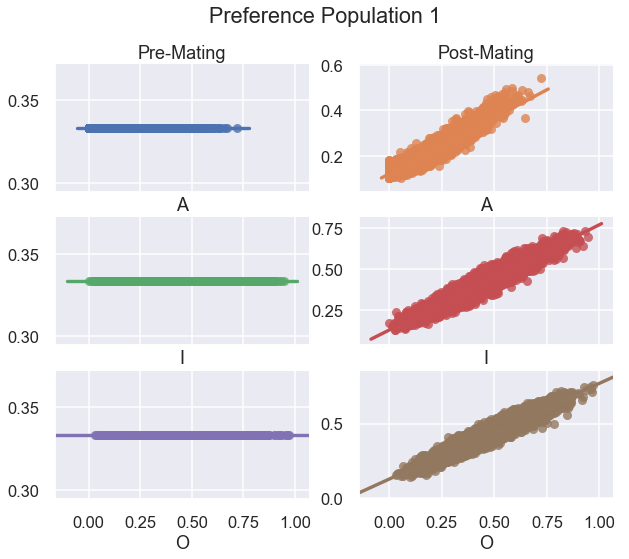

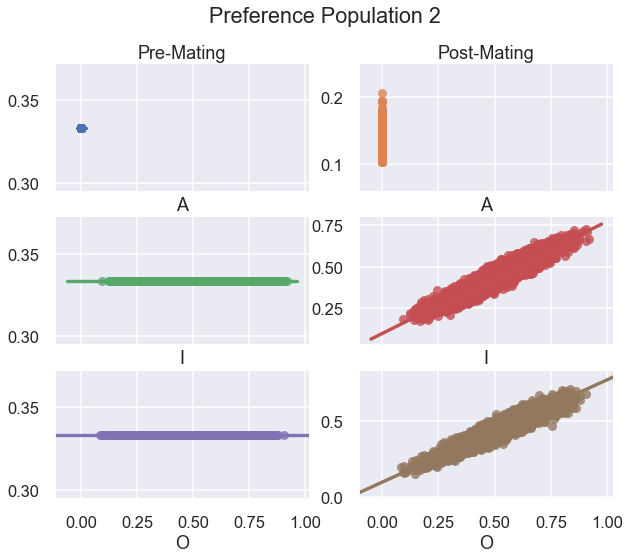

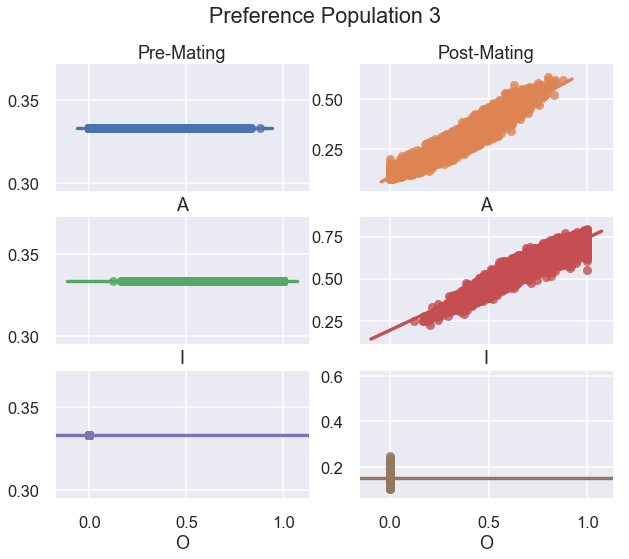

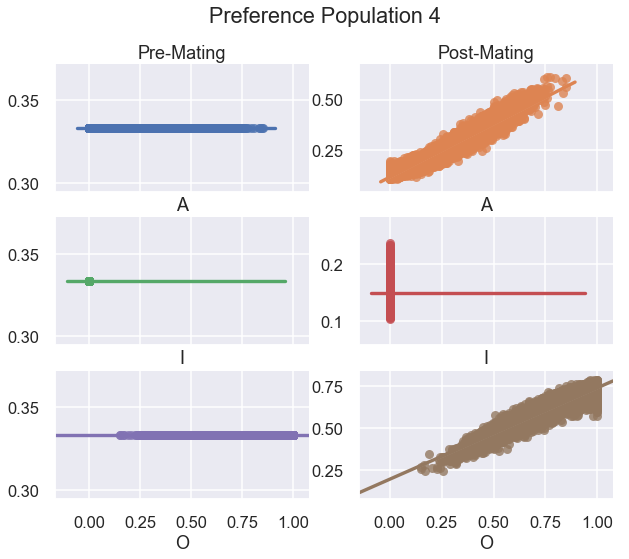

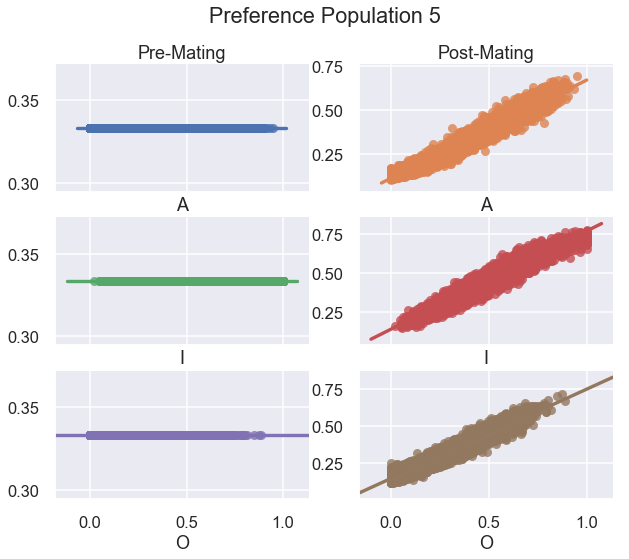

In [44]:
for pop, popData in pops:
    fig, axarr = plt.subplots(3,2, sharex ='col', sharey=False, figsize=(10,8))
    fig.suptitle("Preference Population "+pop)
    plot1 = sns.regplot(x="A", y="preAPref", data=popData, ax=axarr[0,0])
    plot1.set(ylabel="")
    plot1.set_title("Pre-Mating")
    plot2 = sns.regplot(x="A", y="APref", data=popData, ax=axarr[0,1])
    plot2.set(ylabel="")
    plot2.set_title("Post-Mating")
    plot3 = sns.regplot(x="I", y="preIPref", data=popData, ax=axarr[1,0])
    plot3.set(ylabel="")
    plot4 = sns.regplot(x="I", y="IPref", data=popData, ax=axarr[1,1])
    plot4.set(ylabel="")
    plot5 = sns.regplot(x="O", y="preOPref", data=popData, ax=axarr[2,0])
    plot5.set(ylabel="")
    plot6 = sns.regplot(x="O", y="OPref", data=popData, ax=axarr[2,1])
    plot6.set(ylabel="")
    sns.despine()

## Fertility Per Population

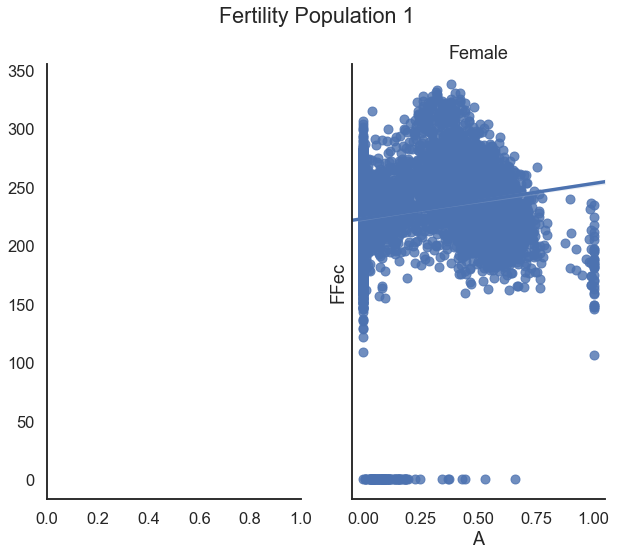

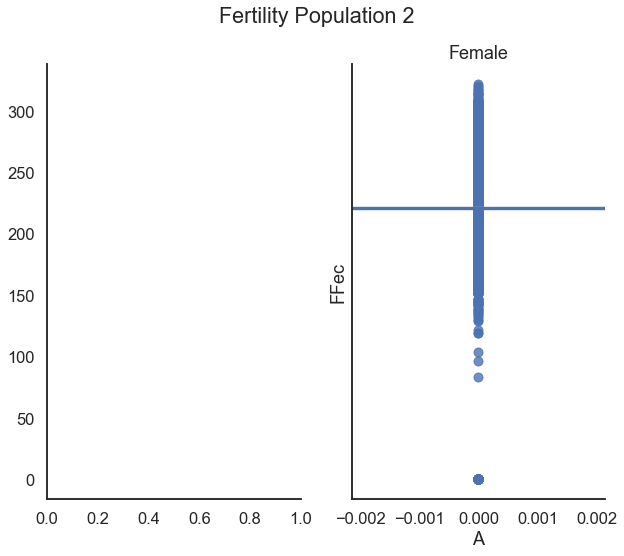

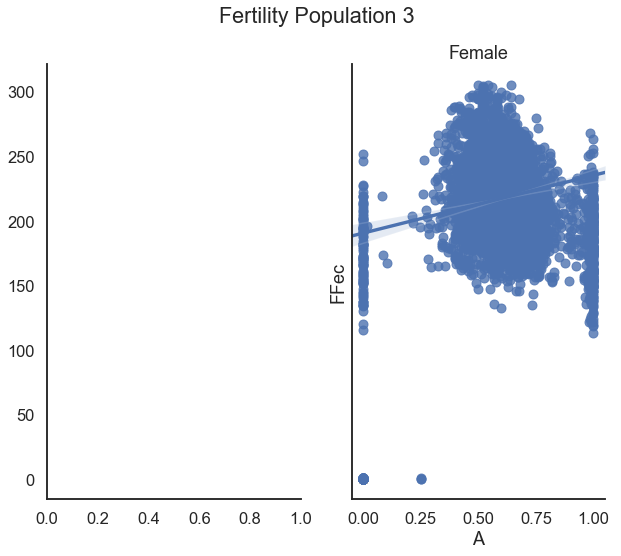

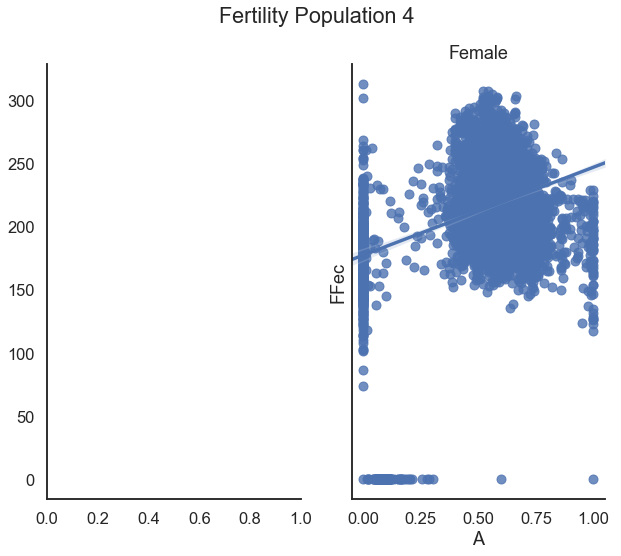

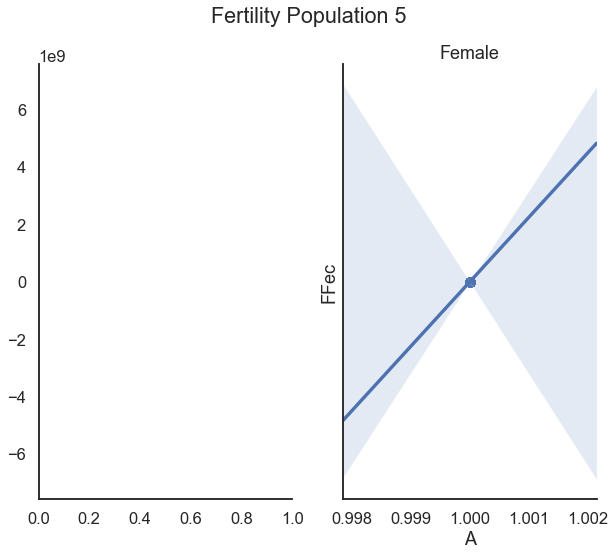

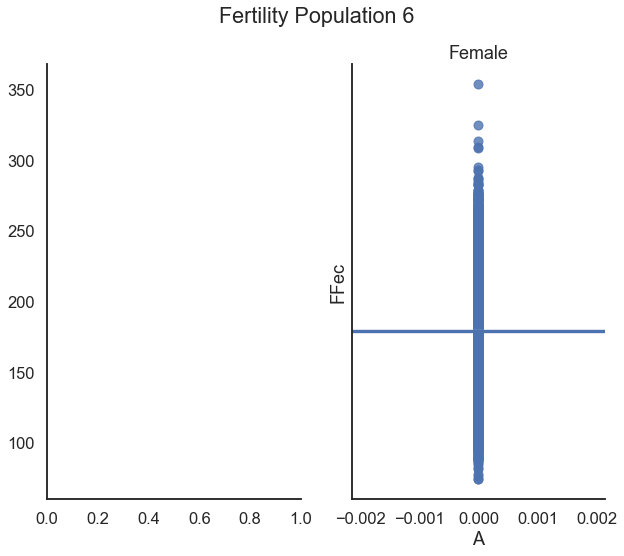

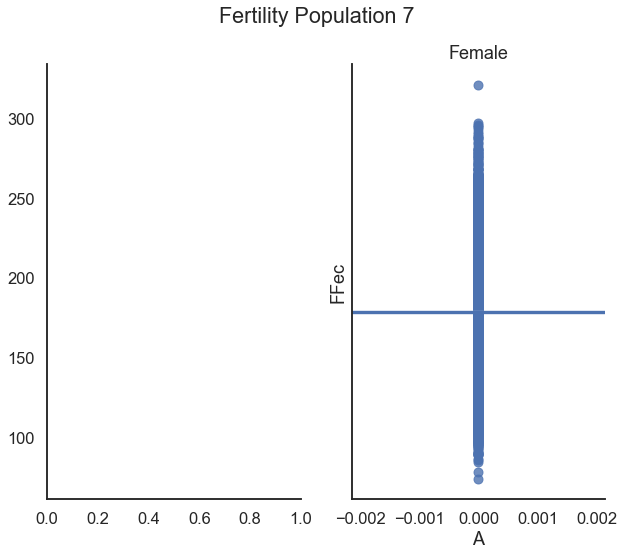

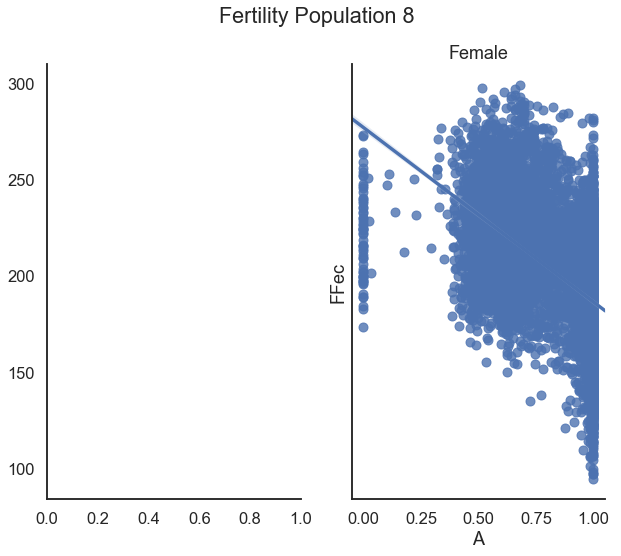

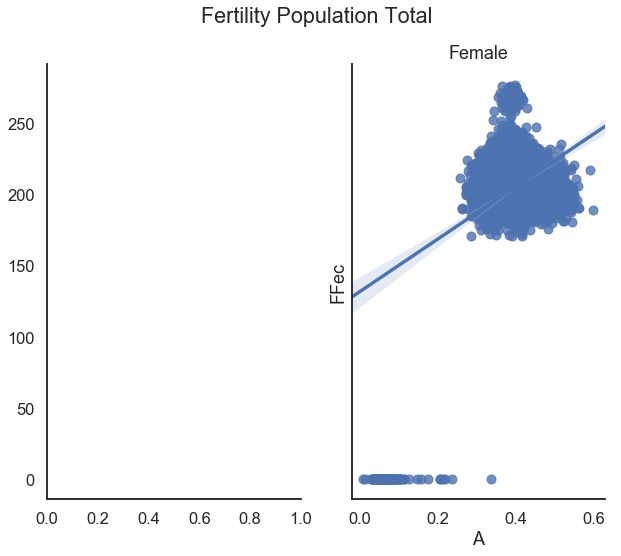

In [9]:
for pop, popData in pops:
    sns.set_style("white")
    fig, axarr = plt.subplots(1,2, sharey=True, figsize=(10,8))
    #plot1 = sns.regplot(x="A", y="MalF", data=popData,ax=axarr[0])
    #plot1.set_title("Male")
    plot2 = sns.regplot(x="A", y="FFec", data=popData, ax=axarr[1])
    plot2.set_title("Female")
    sns.despine()
    fig.suptitle("Fertility Population "+pop)

## Male-male Interactions

In [ ]:
for pop, popData in pops:
    fig = plt.figure(figsize=(10,8))
    plot = sns.regplot(x="A", y="misIdent", data=popData)
    fig.suptitle("Population "+pop)
    sns.despine()

## Sex Distribution

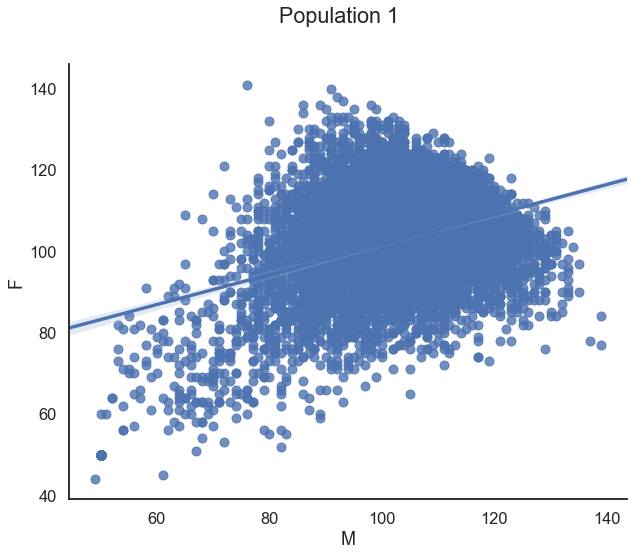

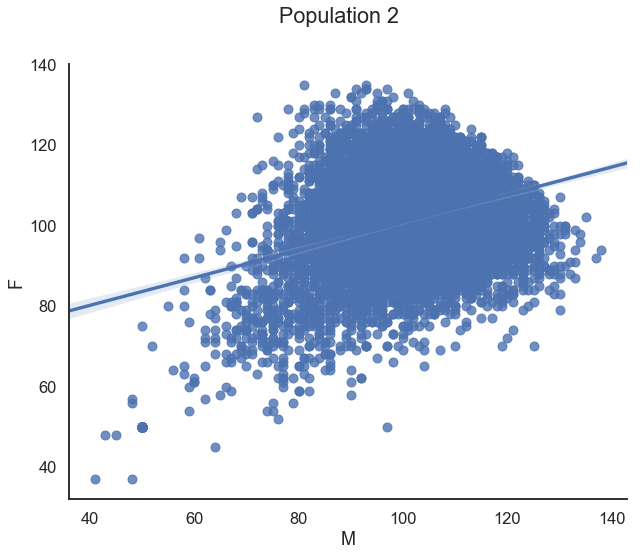

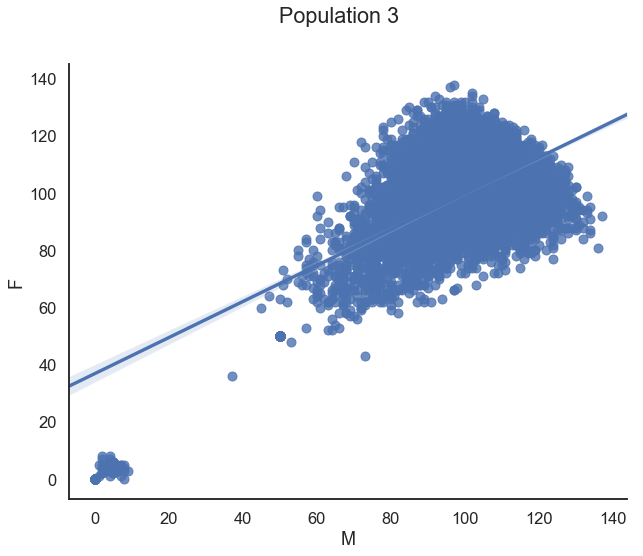

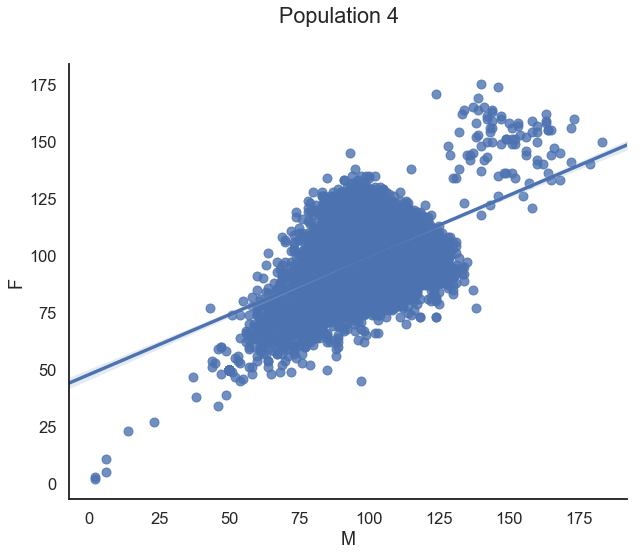

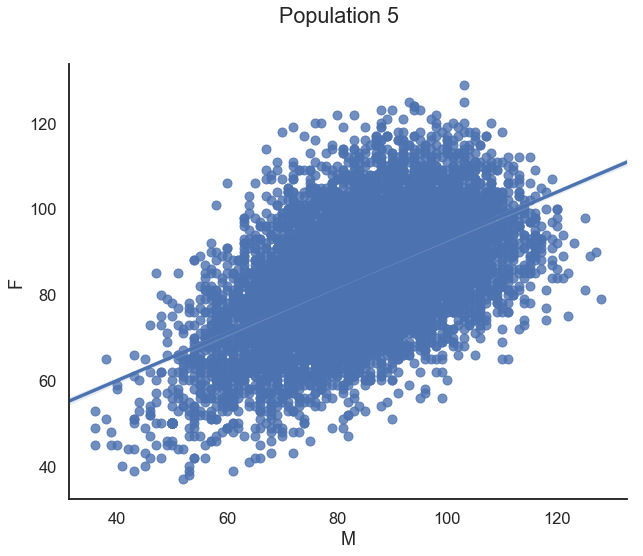

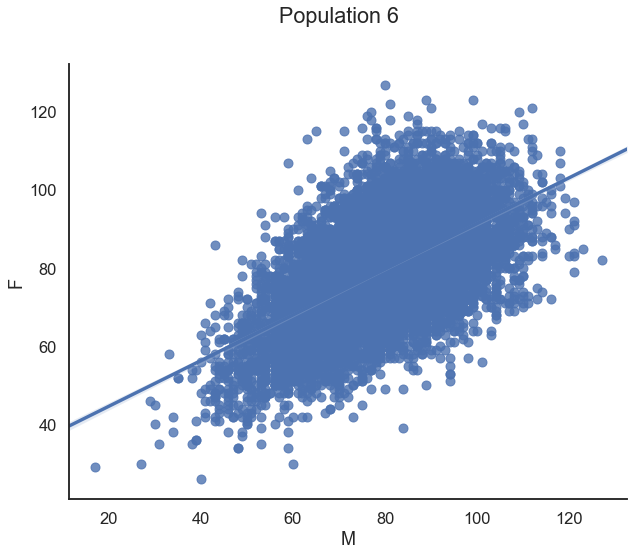

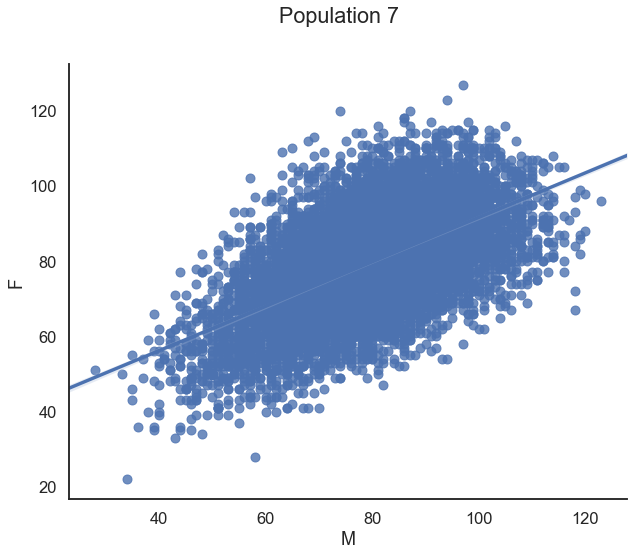

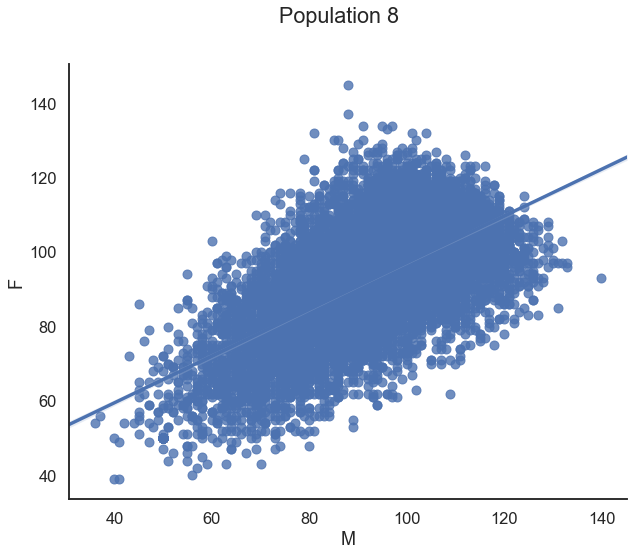

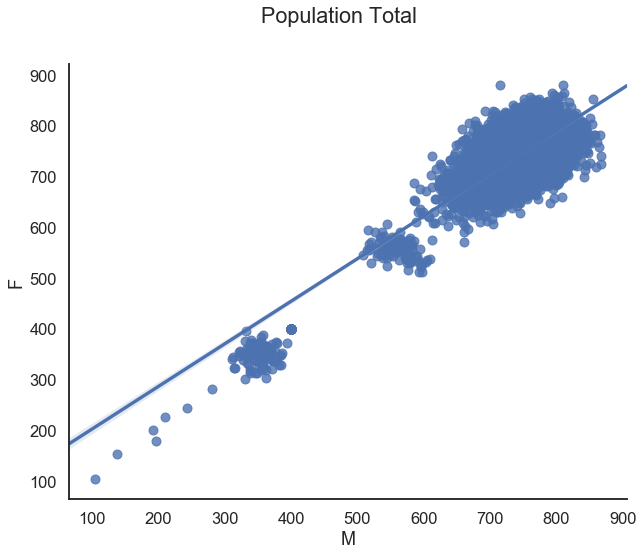

In [10]:
for pop, popData in pops:
    fig = plt.figure(figsize=(10,8))
    plot = sns.regplot(x="M", y="F", data=popData)
    fig.suptitle("Population "+pop)

    sns.despine()

## Migration

In [ ]:
for pop, popData in pops:
    fig = plt.figure(figsize=(10,8))
    plot = sns.regplot(x="Total", y="migrations", data=popData)
    fig.suptitle("Population "+pop)
    sns.despine()

## Multiple Regression

In [11]:
from mpl_toolkits.mplot3d import Axes3D
X = data[["A", "I"]]
print(X.describe())
y = data["O"]
print(y.describe())
X = sm.add_constant(X)
est = sm.OLS(y,X, missing='drop').fit()
print(est.summary())


                  A             I
count  90500.000000  90500.000000
mean       0.398126      0.309385
std        0.368660      0.318740
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.428571      0.304920
75%        0.637931      0.468750
max        1.000000      1.000000
count    90500.000000
mean         0.291981
std          0.327572
min          0.000000
25%          0.000000
50%          0.265036
75%          0.469565
max          1.000000
Name: O, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      O   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 9.535e+06
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:37:30   Log-Likelihood:             2.1491e+05
No. Observations:   

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0.5, 0, 'O')

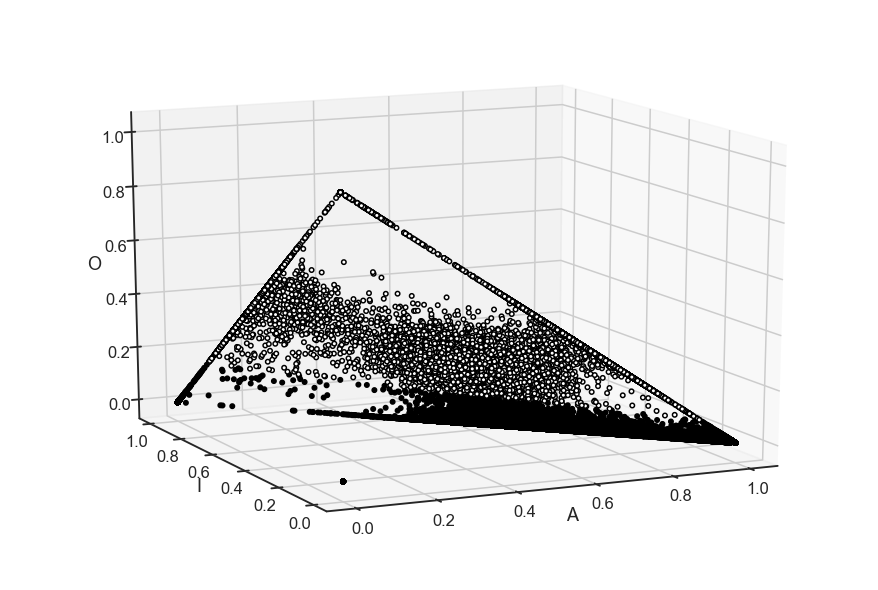

In [12]:
xx1, xx2 = np.meshgrid(np.linspace(X.A.min(), X.A.max(), 100), np.linspace(X.I.min(), X.I.max(), 100))
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

resid = y - est.predict(X)

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

#surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.winter, alpha=0.6, linewidth=0)

ax.scatter(X[resid >= 0].A, X[resid >= 0].I, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].A, X[resid < 0].I, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('A')
ax.set_ylabel('I')
ax.set_zlabel('O')


## Ipyvolume testing

In [13]:
import ipyvolume as ipv
ipv.figure(width=500, height=500, controls=True)
ipv.xyzlabel("A","I", "O")
ipv.scatter(data["A"], data["I"], data["O"], size=1, color="red", marker="sphere")
ipv.style.set_style_dark()
ipv.style.background_color("lime")
ipv.show()

## Bokeh Testing

In [14]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, CDSView, GroupFilter
output_notebook()
p = figure(title="Test", x_axis_label="Males", y_axis_label="Females")
source = ColumnDataSource(finals.reset_index())
pop1 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="1")])
pop2 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="2")])
pop3 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="3")])
pop4 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="4")])
totalPop = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="Total")])

colors = {"1": "red", "2": "blue", "3": "green", "4": "yellow", "Total": "black"}
p.circle(x="M", y="F", legend=None, line_color="red", color = "red", source = source, view=pop1)
p.circle(x="M", y="F", legend=None, line_color="blue", color = "blue", source = source, view=pop2)
p.circle(x="M", y="F", legend=None, line_color="green", color = "green", source = source, view=pop3)
p.circle(x="M", y="F", legend=None, line_color="yellow", color = "yellow", source = source, view=pop4)
p.circle(x="M", y="F", legend=None, line_color="black", color = "black", source = source, view=totalPop)

for pop, popData in pops:
    par = np.polyfit(popData["M"], popData["F"], 1, full=True)
    slope = par[0][0]
    intercept = par[0][1]
    y_predicted = [slope*i + intercept for i in popData["M"]]
    p.line(popData["M"],y_predicted, color=colors[pop], legend='F='+str(round(slope,2))+'M+'+str(round(intercept,2)))

show(p)


Loading BokehJS ...

KeyError: '5'

In [15]:
p = figure(title="A vs I", x_axis_label="A", y_axis_label="I")

colors = {"1": "red", "2": "blue", "3": "green", "4": "yellow", "Total": "black"}
p.circle(x="A", y="I", legend=None, line_color="red", color = "red", source = source, view=pop1)
p.circle(x="A", y="I", legend=None, line_color="blue", color = "blue", source = source, view=pop2)
p.circle(x="A", y="I", legend=None, line_color="green", color = "green", source = source, view=pop3)
p.circle(x="A", y="I", legend=None, line_color="yellow", color = "yellow", source = source, view=pop4)
p.circle(x="A", y="I", legend=None, line_color="black", color = "black", source = source, view=totalPop)

for pop, popData in pops:
    par = np.polyfit(popData["A"], popData["I"], 1, full=True)
    slope = par[0][0]
    intercept = par[0][1]
    y_predicted = [slope*i + intercept for i in popData["A"]]
    p.line(popData["A"],y_predicted, color=colors[pop], legend='I='+str(round(slope,2))+'A+'+str(round(intercept,2)))

show(p)

p = figure(title="A vs I all Pops", x_axis_label="A", y_axis_label="I")
p.circle(x="A", y="I", legend=None, source=source)
par = np.polyfit(finals["A"], finals["I"], 1, full=True)
slope=par[0][0]
intercept = par[0][1]
y_predicted = [slope*i + intercept for i in finals["A"]]
p.line(finals["A"], y_predicted, legend="I= "+str(round(slope,2))+"A+"+str(round(intercept,2)))
show(p)


c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

In [16]:
p = figure(title="A vs O", x_axis_label="A", y_axis_label="O")

colors = {"1": "red", "2": "blue", "3": "green", "4": "yellow", "Total": "black"}
p.circle(x="A", y="O", legend=None, line_color="red", color = "red", source = source, view=pop1)
p.circle(x="A", y="O", legend=None, line_color="blue", color = "blue", source = source, view=pop2)
p.circle(x="A", y="O", legend=None, line_color="green", color = "green", source = source, view=pop3)
p.circle(x="A", y="O", legend=None, line_color="yellow", color = "yellow", source = source, view=pop4)
p.circle(x="A", y="O", legend=None, line_color="black", color = "black", source = source, view=totalPop)

for pop, popData in pops:
    par = np.polyfit(popData["A"], popData["O"], 1, full=True)
    slope = par[0][0]
    intercept = par[0][1]
    y_predicted = [slope*i + intercept for i in popData["A"]]
    p.line(popData["A"],y_predicted, color=colors[pop], legend='O='+str(round(slope,2))+'A+'+str(round(intercept,2)))

show(p)

p = figure(title="A vs O all Pops", x_axis_label="A", y_axis_label="O")
p.circle(x="A", y="O", legend=None, source=source)
par = np.polyfit(finals["A"], finals["O"], 1, full=True)
slope=par[0][0]
intercept = par[0][1]
y_predicted = [slope*i + intercept for i in finals["A"]]
p.line(finals["A"], y_predicted, legend="O= "+str(round(slope,2))+"A+"+str(round(intercept,2)))
show(p)


LinAlgError: SVD did not converge in Linear Least Squares

In [17]:
p = figure(title="O vs I", x_axis_label="O", y_axis_label="I")

colors = {"1": "red", "2": "blue", "3": "green", "4": "yellow", "Total": "black"}
p.circle(x="O", y="I", legend=None, line_color="red", color = "red", source = source, view=pop1)
p.circle(x="O", y="I", legend=None, line_color="blue", color = "blue", source = source, view=pop2)
p.circle(x="O", y="I", legend=None, line_color="green", color = "green", source = source, view=pop3)
p.circle(x="O", y="I", legend=None, line_color="yellow", color = "yellow", source = source, view=pop4)
p.circle(x="O", y="I", legend=None, line_color="black", color = "black", source = source, view=totalPop)

for pop, popData in pops:
    par = np.polyfit(popData["O"], popData["I"], 1, full=True)
    slope = par[0][0]
    intercept = par[0][1]
    y_predicted = [slope*i + intercept for i in popData["O"]]
    p.line(popData["O"],y_predicted, color=colors[pop], legend='I='+str(round(slope,2))+'O+'+str(round(intercept,2)))

show(p)

p = figure(title="O vs I all Pops", x_axis_label="O", y_axis_label="I")
p.circle(x="O", y="I", legend=None, source=source)
par = np.polyfit(finals["O"], finals["I"], 1, full=True)
slope=par[0][0]
intercept = par[0][1]
y_predicted = [slope*i + intercept for i in finals["O"]]
p.line(finals["O"], y_predicted, legend="I= "+str(round(slope,2))+"O+"+str(round(intercept,2)))
show(p)


LinAlgError: SVD did not converge in Linear Least Squares